In [12]:
import os
import pandas as pd

BASE_DIR = r"C:\Users\HP\OneDrive\Desktop\Phase 1\Clean Data"

death_path = os.path.join(BASE_DIR, "death_model_matrix_imputed_v1.csv")
#hosp_path  = os.path.join(BASE_DIR, "hospitalization_model_matrix_imputed_v1.csv")
#adr_path   = os.path.join(BASE_DIR, "severe_adr_model_matrix_imputed_v1.csv")

death_df = pd.read_csv(death_path)
#hosp_df  = pd.read_csv(hosp_path)
#adr_df   = pd.read_csv(adr_path)

print("Death shape:", death_df.shape)
#print("Hospitalization shape:", hosp_df.shape)
#print("Severe ADR shape:", adr_df.shape)

death_df.head()


Death shape: (406, 75)


,patient_id,death_outcome,survival_days,age,age_group,gender,ethnicity,education_level,bmi_category,employment_status,...,any_toxicity,end_due_to_progression,max_combo_regimen_size,total_unique_active_drugs,time_from_diagnosis_to_first_treatment_days,received_cardiotoxic_drug,received_nephrotoxic_drug,received_neurotoxic_drug,received_hematotoxic_drug,received_targeted_therapy
0,1_AO San Pio,Absent / No,998,66.0,> 65 years,Male,Caucasian,High School,18.5-24.9 Normal Weight,Retired,...,0.0,0.0,3.0,3.0,24.0,0.0,1.0,1.0,1.0,1.0
1,1_AORN A. Cardarelli,Present / Yes,838,72.0,> 65 years,Male,Caucasian,Elementary School,18.5-24.9 Normal Weight,Worker,...,0.0,0.0,4.0,6.0,42.0,0.0,1.0,1.0,1.0,1.0
2,1_AORN Monaldi – Cotugno - C.T.O.,Absent / No,577,57.0,<= 65 years,Male,Caucasian,Middle School,25-29.99 Overweight,Worker,...,0.0,0.0,3.0,6.0,46.0,0.0,1.0,1.0,1.0,1.0
3,1_AORN San Giuseppe Moscati,Absent / No,635,80.0,> 65 years,Male,Caucasian,Not Known / Missing,25-29.99 Overweight,Not Known / Missing,...,0.0,0.0,4.0,4.0,100.0,0.0,0.0,0.0,1.0,1.0
4,1_AORN Sant’Anna e San Sebastiano,Absent / No,977,57.0,<= 65 years,Female,Caucasian,High School,18.5-24.9 Normal Weight,Worker,...,0.0,0.0,2.0,2.0,890.0,0.0,1.0,1.0,0.0,0.0


In [13]:
import numpy as np

# Death: 1 = died, 0 = alive/censored
death_df["death_event"] = death_df["death_outcome"].map({
    "Present / Yes": 1,
    "Absent / No": 0
}).astype(int)

# Make sure survival_days is numeric
death_df["survival_days"] = pd.to_numeric(death_df["survival_days"], errors="coerce")

# Hospitalization: already 0/1, just ensure int
#hosp_df["hospitalization_event"] = hosp_df["hospitalization_event"].astype(int)

# Severe ADR: keep only rows with definite 0 or 1, drop NaNs
#adr_model_df = adr_df.copy()
#adr_model_df = adr_model_df[adr_model_df["severe_adr_event"].notna()].copy()
#adr_model_df["severe_adr_event"] = adr_model_df["severe_adr_event"].astype(int)

print("Death deaths:", death_df["death_event"].value_counts())
#print("Hosp events:", hosp_df["hospitalization_event"].value_counts())
#print("Severe ADR events:", adr_model_df["severe_adr_event"].value_counts())


Death deaths: death_event
0    320
1     86
Name: count, dtype: int64


In [15]:
import os
import pandas as pd

BASE_DIR = r"C:\Users\HP\OneDrive\Desktop\Phase 1\Clean Data"

death_path = os.path.join(BASE_DIR, "death_model_matrix_imputed_v1.csv")
#hosp_path  = os.path.join(BASE_DIR, "hospitalization_model_matrix_imputed_v1.csv")
#adr_path   = os.path.join(BASE_DIR, "severe_adr_model_matrix_imputed_v1.csv")

death_df = pd.read_csv(death_path)
#hosp_df  = pd.read_csv(hosp_path)
#adr_df   = pd.read_csv(adr_path)


def inspect_covariates(df, id_col, outcome_cols, dataset_name):

    predictors = [
        col for col in df.columns
        if col not in outcome_cols + [id_col]
    ]

    predictors_sorted = sorted(predictors)

    print(f"\n================= {dataset_name.upper()} =================")
    print(f"ID column        : {id_col}")
    print(f"Outcome column(s): {outcome_cols}")
    print(f"Total predictors : {len(predictors_sorted)}\n")

    # 1. Numbered list
    for i, col in enumerate(predictors_sorted, start=1):
        print(f"{i:02d}. {col}")

    # 2. Raw Python list for copy-paste into modeling code
    print("\nPython list ready to use:")
    print(predictors_sorted, "\n")

    return predictors_sorted


death_covariates = inspect_covariates(
    df=death_df,
    id_col="patient_id",
    outcome_cols=["death_outcome", "survival_days"],
    dataset_name="Death Outcome"
)

#hosp_covariates = inspect_covariates(
#    df=hosp_df,
#    id_col="patient_id",
#    outcome_cols=["hospitalization_event"],
 #   dataset_name="Hospitalization"
#)

#adr_covariates = inspect_covariates(
#    df=adr_df,
#    id_col="patient_id",
#    outcome_cols=["severe_adr_event"],
#    dataset_name="Severe ADR"
#)



================= DEATH OUTCOME =================
ID column        : patient_id
Outcome column(s): ['death_outcome', 'survival_days']
Total predictors : 72

01. IPB
02. adr_description
03. adr_n_grado1
04. adr_n_grado2
05. adr_n_grado3
06. adr_n_grado4
07. adr_n_grado5
08. adr_n_tot
09. age
10. age_group
11. alcohol_consumption
12. alt_gpt_range
13. anemia_comorbidity
14. any_dose_reduction
15. any_toxicity
16. aortic_insufficiency
17. ast_got_range
18. asthma
19. atrial_fibrillation
20. bmi_category
21. cardiovascular_disorders
22. cci_score
23. cerebrovascular_disorders
24. chemio_fine_tossicita
25. copd
26. creatinine_range
27. depressive_syndrome
28. diabete_tipo_II
29. direct_bilirubin_range
30. dyslipidemia
31. education_level
32. employment_status
33. end_due_to_progression
34. end_reason_other_any_line
35. end_reason_progression_any_line
36. ethnicity
37. farmaci_cat_n
38. gastroesophageal_reflux_full
39. gastrointestinal_disorders
40. gender
41. genotipo_DPYD_type
42. hemoglo

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests



# Outcome variable in your data (numeric survival time)
outcome_var = "death_outcome"

# Relevant predictors present in death_df (all of these exist in your file)
relevant_features = [
    # Demographics & socio-economic
    "age_group",
    "gender",
    "ethnicity",
    "education_level",
    "employment_status",
    "bmi_category",
    "smoking_status_detail",
    "alcohol_consumption",

    # Frailty / vulnerability
    "IPB",
    "fi_lab_category",

    # Comorbidity burden
    "cci_score",
    "anemia_comorbidity",
    "asthma",
    "atrial_fibrillation",
    "copd",
    "depressive_syndrome",
    "diabete_tipo_II",
    "dyslipidemia",
    "hypertension",
    "hypertensive_heart_disease",
    "ischemic_heart_disease",
    "renal_insufficiency",
    "obesity_comorbidity",
    "psychiatric_disorders",
    "cardiovascular_disorders",
    "cerebrovascular_disorders",
    "gastrointestinal_disorders",
    "gastroesophageal_reflux_full",
    "aortic_insufficiency",

    # Baseline laboratory ranges
    "alt_gpt_range",
    "ast_got_range",
    "creatinine_range",
    "direct_bilirubin_range",
    "total_bilirubin_range",
    "hemoglobin_range",
    "platelet_count_range",
    "white_blood_cells_range",
    "red_blood_cells_range",
    "neutrophils_percent_range",

    # Oncological baseline characteristics
    "tumor_type",
    "molecular_alterations",
    "mutations_present",
    "genotipo_DPYD_type",
    "radiotherapy_status",
    "surgical_intervention",
    "time_from_diagnosis_to_first_treatment_days"
]

# ------------------------------------------------------------------
# 2. Helper: check if a variable is binary (0/1, Yes/No, True/False)
# ------------------------------------------------------------------
def is_binary(series):
    unique_vals = series.dropna().unique()
    return (
        len(unique_vals) == 2
        and set(unique_vals).issubset({0, 1, "Yes", "No", True, False})
    )

# ------------------------------------------------------------------
# 3. Univariate association tests for each feature vs survival_days
# ------------------------------------------------------------------
results = []

for feature in relevant_features:
    if feature not in death_df.columns:
        continue  # safety, but in your data all are present

    # Drop rows with missing feature or outcome
    df = death_df[[feature, outcome_var]].dropna()
    if df.empty:
        continue

    feat_is_num = np.issubdtype(df[feature].dtype, np.number)
    out_is_num = np.issubdtype(df[outcome_var].dtype, np.number)

    try:
        # 3.1 Both categorical/binary -> Chi-square
        if not feat_is_num and not out_is_num:
            ctab = pd.crosstab(df[feature], df[outcome_var])
            if ctab.shape[0] < 2 or ctab.shape[1] < 2:
                continue
            chi2, p, dof, ex = stats.chi2_contingency(ctab)
            test = "Chi-square"

        # 3.2 Numeric feature vs categorical outcome
        elif feat_is_num and not out_is_num:
            if is_binary(df[outcome_var]):
                groups = [
                    df.loc[df[outcome_var] == val, feature]
                    for val in df[outcome_var].unique()
                ]
                if len(groups) != 2:
                    continue
                t_stat, p = stats.ttest_ind(*groups, nan_policy="omit")
                test = "T-test"
            else:
                groups = [
                    df.loc[df[outcome_var] == val, feature]
                    for val in df[outcome_var].unique()
                ]
                if len(groups) < 2:
                    continue
                f_stat, p = stats.f_oneway(*groups)
                test = "ANOVA"

        # 3.3 Categorical feature vs numeric outcome  (this is the main case for survival_days)
        elif not feat_is_num and out_is_num:
            if is_binary(df[feature]):
                groups = [
                    df.loc[df[feature] == val, outcome_var]
                    for val in df[feature].unique()
                ]
                if len(groups) != 2:
                    continue
                t_stat, p = stats.ttest_ind(*groups, nan_policy="omit")
                test = "T-test"
            else:
                groups = [
                    df.loc[df[feature] == val, outcome_var]
                    for val in df[feature].unique()
                ]
                if len(groups) < 2:
                    continue
                f_stat, p = stats.f_oneway(*groups)
                test = "ANOVA"

        # 3.4 Both numeric -> Pearson correlation
        else:
            if df[feature].nunique() < 2:
                continue
            r, p = stats.pearsonr(df[feature], df[outcome_var])
            test = "Pearson correlation"

        results.append({
            "Feature": feature,
            "Outcome": outcome_var,
            "Test_Used": test,
            "p_value": p
        })

    except Exception as e:
        # In case of weird errors (perfect separation, etc.)
        results.append({
            "Feature": feature,
            "Outcome": outcome_var,
            "Test_Used": "Error",
            "p_value": np.nan
        })

# ------------------------------------------------------------------
# 4. Build DataFrame and adjust p-values (FDR)
# ------------------------------------------------------------------
results_df = pd.DataFrame(results)

if not results_df.empty and results_df["p_value"].notna().any():
    _, corrected_pvals, _, _ = multipletests(
        results_df["p_value"].dropna(),
        alpha=0.05,
        method="fdr_bh"
    )
    # Assign back only to rows with non-missing p-values
    results_df.loc[results_df["p_value"].notna(), "p_value_fdr_bh"] = corrected_pvals
else:
    print("Warning: no valid tests were performed, results_df is empty.")

# ------------------------------------------------------------------
# 5. Save results
# ------------------------------------------------------------------
out_path = r"C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\univariate_screening_survival_days.xlsx"
results_df.to_excel(out_path, index=False)

print("Univariate screening complete.")
print("Results saved as:", out_path)


Univariate screening complete.
Results saved as: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\univariate_screening_survival_days.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_5648\1006712646.py:192: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  results_df.to_excel(out_path, index=False)


In [20]:
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests
from math import sqrt

# -----------------------------
# 1. Outcome and feature list
# -----------------------------

# We focus only on the death dataset 
outcome_var = "death_outcome"

# Your feature list (many will be skipped if not present in death_df)
relevant_features = [
     # Demographics & socio-economic
    "age_group",
    "gender",
    "ethnicity",
    "education_level",
    "employment_status",
    "bmi_category",
    "smoking_status_detail",
    "alcohol_consumption",

    # Frailty / vulnerability
    "IPB",
    "fi_lab_category",

    # Comorbidity burden
    "cci_score",
    "anemia_comorbidity",
    "asthma",
    "atrial_fibrillation",
    "copd",
    "depressive_syndrome",
    "diabete_tipo_II",
    "dyslipidemia",
    "hypertension",
    "hypertensive_heart_disease",
    "ischemic_heart_disease",
    "renal_insufficiency",
    "obesity_comorbidity",
    "psychiatric_disorders",
    "cardiovascular_disorders",
    "cerebrovascular_disorders",
    "gastrointestinal_disorders",
    "gastroesophageal_reflux_full",
    "aortic_insufficiency",

    # Baseline laboratory ranges
    "alt_gpt_range",
    "ast_got_range",
    "creatinine_range",
    "direct_bilirubin_range",
    "total_bilirubin_range",
    "hemoglobin_range",
    "platelet_count_range",
    "white_blood_cells_range",
    "red_blood_cells_range",
    "neutrophils_percent_range",

    # Oncological baseline characteristics
    "tumor_type",
    "molecular_alterations",
    "mutations_present",
    "genotipo_DPYD_type",
    "radiotherapy_status",
    "surgical_intervention",
    "time_from_diagnosis_to_first_treatment_days"
]




# -----------------------------
# 2. Utility functions
# -----------------------------

def is_binary(series):
    """Check if variable is binary Yes/No or 0/1-ish."""
    unique_vals = series.dropna().unique()
    return (
        len(unique_vals) == 2
        and set(unique_vals).issubset({0, 1, "Yes", "No", True, False})
    )

# Cohen's d for t test
def cohens_d(x, y):
    x = x.dropna()
    y = y.dropna()
    nx, ny = len(x), len(y)
    if nx < 2 or ny < 2:
        return np.nan
    dof = nx + ny - 2
    pooled_std = sqrt(((nx - 1) * x.std()**2 + (ny - 1) * y.std()**2) / dof)
    return (x.mean() - y.mean()) / pooled_std if pooled_std > 0 else np.nan

# Cramér's V for chi square
def cramers_v(chi2, n, r, c):
    return sqrt(chi2 / (n * (min(r - 1, c - 1)))) if n > 0 and min(r - 1, c - 1) > 0 else np.nan


# -----------------------------
# 3. Main analysis for death_df
# -----------------------------

results = []

for feature in relevant_features:
    # Skip features not present in the death matrix
    if feature not in death_df.columns:
        continue

    # Build temporary dataframe with no missing in feature or outcome
    df_tmp = death_df[[feature, outcome_var]].dropna()
    if df_tmp.empty:
        continue

    feat_is_num = np.issubdtype(df_tmp[feature].dtype, np.number)
    out_is_num = np.issubdtype(df_tmp[outcome_var].dtype, np.number)  # survival_days is numeric

    try:
        # --- Case 1: both categorical (just in case survival_days is ever coded categorically) ---
        if not feat_is_num and not out_is_num:
            ctab = pd.crosstab(df_tmp[feature], df_tmp[outcome_var])
            if ctab.shape[0] < 2 or ctab.shape[1] < 2:
                continue
            chi2, p, dof, ex = stats.chi2_contingency(ctab)
            test = "Chi-square"
            n = ctab.to_numpy().sum()
            effect_size = cramers_v(chi2, n, *ctab.shape)

        # --- Case 2: categorical feature vs numeric outcome (this will be most common here) ---
        elif not feat_is_num and out_is_num:
            # Binary feature -> T test
            if is_binary(df_tmp[feature]):
                vals = df_tmp[feature].unique()
                if len(vals) != 2:
                    continue
                groups = [df_tmp.loc[df_tmp[feature] == v, outcome_var] for v in vals]
                if any(len(g) < 2 for g in groups):
                    continue
                t_stat, p = stats.ttest_ind(groups[0], groups[1], nan_policy="omit")
                test = "T-test"
                effect_size = cohens_d(groups[0], groups[1])
            # Multi-category feature -> ANOVA
            else:
                groups = [
                    df_tmp.loc[df_tmp[feature] == v, outcome_var]
                    for v in df_tmp[feature].unique()
                ]
                # require at least 2 groups with some data
                if sum(len(g) > 1 for g in groups) < 2:
                    continue
                f_stat, p = stats.f_oneway(*groups)
                test = "ANOVA"
                # eta-squared like effect size
                grand_mean = df_tmp[outcome_var].mean()
                ss_between = sum(len(g) * (g.mean() - grand_mean) ** 2 for g in groups)
                ss_total = ((df_tmp[outcome_var] - grand_mean) ** 2).sum()
                effect_size = ss_between / ss_total if ss_total > 0 else np.nan

        # --- Case 3: both numeric -> Pearson correlation ---
        elif feat_is_num and out_is_num:
            # require some variance
            if df_tmp[feature].nunique() < 2:
                continue
            r, p = stats.pearsonr(df_tmp[feature], df_tmp[outcome_var])
            test = "Pearson correlation"
            effect_size = abs(r)

        # --- Case 4: numeric feature vs categorical outcome (unlikely here, but kept for completeness) ---
        else:
            # treat outcome as categorical if it somehow gets encoded that way
            if is_binary(df_tmp[outcome_var]):
                vals = df_tmp[outcome_var].unique()
                if len(vals) != 2:
                    continue
                groups = [df_tmp.loc[df_tmp[outcome_var] == v, feature] for v in vals]
                if any(len(g) < 2 for g in groups):
                    continue
                t_stat, p = stats.ttest_ind(groups[0], groups[1], nan_policy="omit")
                test = "T-test"
                effect_size = cohens_d(groups[0], groups[1])
            else:
                groups = [
                    df_tmp.loc[df_tmp[outcome_var] == v, feature]
                    for v in df_tmp[outcome_var].unique()
                ]
                if sum(len(g) > 1 for g in groups) < 2:
                    continue
                f_stat, p = stats.f_oneway(*groups)
                test = "ANOVA"
                grand_mean = df_tmp[feature].mean()
                ss_between = sum(len(g) * (g.mean() - grand_mean) ** 2 for g in groups)
                ss_total = ((df_tmp[feature] - grand_mean) ** 2).sum()
                effect_size = ss_between / ss_total if ss_total > 0 else np.nan

        results.append({
            "Feature": feature,
            "Outcome": outcome_var,
            "Test_Used": test,
            "p_value": p,
            "Effect_Size": effect_size
        })

    except Exception as e:
        # If something blows up for a variable, just record the error
        results.append({
            "Feature": feature,
            "Outcome": outcome_var,
            "Test_Used": "Error",
            "p_value": np.nan,
            "Effect_Size": np.nan
        })

# -----------------------------
# 4. Compile results + FDR
# -----------------------------

results_df = pd.DataFrame(results)

if not results_df.empty and results_df["p_value"].notna().any():
    # FDR correction only on non-missing p-values
    mask = results_df["p_value"].notna()
    _, corrected_p, _, _ = multipletests(
        results_df.loc[mask, "p_value"],
        alpha=0.05,
        method="fdr_bh"
    )
    results_df.loc[mask, "p_value_fdr_bh"] = corrected_p
else:
    print("Warning: no valid tests were performed (results_df is empty or all p-values are NaN).")

# -----------------------------
# 5. Save to Excel
# -----------------------------

out_path = r"C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\univariate_screening_death_death_outcome_with_effect_size.xlsx"
results_df.to_excel(out_path, index=False)

print("✅ Univariate screening complete.")
print("Results saved as:", out_path)


✅ Univariate screening complete.
Results saved as: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\univariate_screening_death_death_outcome_with_effect_size.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_5648\4117905546.py:241: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  results_df.to_excel(out_path, index=False)


In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define output folder
PLOT_DIR = out_path = r"C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\plots"
os.makedirs(PLOT_DIR, exist_ok=True)

TOP_N = 15
TOP_LABELS = 25

# Column names in results_df
PVAL_COL = "p_value_fdr_bh"   # FDR-adjusted p value
P_COL    = "p_value"          # raw p value
EFFECT_COL = "Effect_Size"    # numeric effect size
TEST_COL   = "Test_Used"      # test name

outcomes_list = results_df["Outcome"].dropna().unique()

print("Saving plots to:", PLOT_DIR)
print(f"Using columns -> PVAL_COL: {PVAL_COL}, P_COL: {P_COL}, EFFECT_COL: {EFFECT_COL}")

# ---------------- BAR PLOTS ---------------- #
for outc in outcomes_list:
    sub = results_df[results_df["Outcome"] == outc].copy()
    sub = sub[sub[PVAL_COL].notna()].sort_values(PVAL_COL).head(TOP_N)
    if sub.empty:
        continue

    fig = plt.figure(figsize=(8, 6))

    y = sub["Feature"]
    x = -np.log10(sub[PVAL_COL].astype(float).clip(lower=1e-300))

    plt.barh(y, x)
    plt.gca().invert_yaxis()
    plt.xlabel("-log10(FDR q-value)")
    plt.title(f"Top {TOP_N} features for {outc} (Death Outcome)")

    # label with test used
    for i, v in enumerate(x):
        label = str(sub.iloc[i][TEST_COL])
        plt.text(v, i, f"  {label}", va="center", fontsize=8)

    plt.tight_layout()
    plt.savefig(os.path.join(PLOT_DIR, f"univariate_top{TOP_N}_{outc}_death.png"), dpi=200)
    plt.close()


# ---------------- CLINICIAN-FACING VOLCANO PLOTS ---------------- #
Q_THRESH = 0.05
MAX_LABELS = 12   # keep this small for clinicians
EXCLUDE_REGEX = r"(_nan\b|_RARE\b)"  # remove these categories from plot + labels

# Optional label repelling
try:
    from adjustText import adjust_text
    HAS_ADJUSTTEXT = True
except Exception:
    HAS_ADJUSTTEXT = False


def pretty_label(s: str) -> str:
    """Make feature names readable for clinicians."""
    s = str(s)

    # common cleanups
    s = s.replace("_", " ")
    s = s.replace("Maschi", "Male").replace("Femmine", "Female")
    s = " ".join(s.split())

    # shorten common patterns (tune as you like)
    s = s.replace("white blood cells range", "WBC range")
    s = s.replace("red blood cells range", "RBC range")
    s = s.replace("hemoglobin range", "Hb range")
    s = s.replace("platelet count range", "Platelets range")
    s = s.replace("neutrophils percent range", "Neutrophils range")

    return s


for outc in outcomes_list:
    sub = results_df.loc[results_df["Outcome"] == outc].copy()
    sub = sub[sub[PVAL_COL].notna()].copy()
    if sub.empty:
        continue

    # remove intercept-like junk and nan/rare categories
    sub = sub[~sub["Feature"].astype(str).str.contains("Intercept", case=False, na=False)]
    sub = sub[~sub["Feature"].astype(str).str.contains(EXCLUDE_REGEX, case=False, na=False)]

    # numeric safety
    sub["effect"] = pd.to_numeric(sub[EFFECT_COL], errors="coerce")
    sub["qval"] = pd.to_numeric(sub[PVAL_COL], errors="coerce")
    sub = sub.dropna(subset=["effect", "qval"])
    if sub.empty:
        continue

    sub["neglog10_q"] = -np.log10(sub["qval"].clip(lower=1e-300))

    # significance categories
    sig = sub["qval"] < Q_THRESH
    up = sig & (sub["effect"] > 0)
    down = sig & (sub["effect"] < 0)
    nonsig = ~sig

    # --- Choose what to label ---
    # Label priority:
    # 1) significant points with smallest q-values
    # 2) among significant, larger |effect|
    # If not enough significant points, fill with largest |effect| overall
    sub["_abs_eff"] = sub["effect"].abs()
    sig_pool = sub[sig].sort_values(["qval", "_abs_eff"], ascending=[True, False])
    if len(sig_pool) >= MAX_LABELS:
        label_df = sig_pool.head(MAX_LABELS)
    else:
        fill = sub.sort_values(["_abs_eff", "qval"], ascending=[False, True]).head(MAX_LABELS)
        label_df = pd.concat([sig_pool, fill]).drop_duplicates().head(MAX_LABELS)

    # --- Plot ---
    plt.figure(figsize=(12, 7))

    # Non-significant
    plt.scatter(
        sub.loc[nonsig, "effect"],
        sub.loc[nonsig, "neglog10_q"],
        s=28,
        alpha=0.35,
        label="Not significant"
    )

    # Significant up/down
    plt.scatter(
        sub.loc[up, "effect"],
        sub.loc[up, "neglog10_q"],
        s=40,
        alpha=0.9,
        label=f"q<{Q_THRESH}, effect>0"
    )

    plt.scatter(
        sub.loc[down, "effect"],
        sub.loc[down, "neglog10_q"],
        s=40,
        alpha=0.9,
        label=f"q<{Q_THRESH}, effect<0"
    )

    # thresholds
    plt.axhline(-np.log10(Q_THRESH), linestyle="--", linewidth=1)
    plt.axvline(0.0, linestyle="--", linewidth=1)

    # nice x limits (winsorize a bit so outliers do not ruin scale)
    x = sub["effect"].values
    if len(x) > 10:
        lo, hi = np.quantile(x, [0.02, 0.98])
        max_abs = max(abs(lo), abs(hi)) * 1.25
    else:
        max_abs = max(abs(sub["effect"].min()), abs(sub["effect"].max())) * 1.25

    max_abs = max(max_abs, 0.1)
    plt.xlim(-max_abs, max_abs)

    plt.xlabel("Effect size (signed)")
    plt.ylabel("-log10(FDR q-value)")
    plt.title(f"Volcano plot: {outc} (Death outcome)")
    plt.legend(loc="upper right", fontsize=8, frameon=False)

    # labels
    texts = []
    for _, row in label_df.iterrows():
        texts.append(
            plt.text(
                row["effect"],
                row["neglog10_q"],
                pretty_label(row["Feature"]),
                fontsize=9
            )
        )

    # repel labels if possible
    if HAS_ADJUSTTEXT and texts:
        adjust_text(
            texts,
            expand_points=(1.2, 1.4),
            expand_text=(1.2, 1.4),
            arrowprops=dict(arrowstyle="-", lw=0.8),
        )

    plt.tight_layout()

    out_png = os.path.join(PLOT_DIR, f"univariate_volcano_{outc}_death_clinician.png")
    plt.savefig(out_png, dpi=300)
    plt.close()

    # export the labeled points table for reporting
    out_xlsx = os.path.join(PLOT_DIR, f"univariate_volcano_{outc}_labeled_points.xlsx")
    label_df_export = label_df[["Feature", "effect", "qval", "neglog10_q", TEST_COL]].copy()
    label_df_export.rename(columns={TEST_COL: "Test_Used"}, inplace=True)
    label_df_export.to_excel(out_xlsx, index=False)

    print("Saved:", out_png)
    print("Labeled points:", out_xlsx)


# ---------------- SUMMARY OUTPUT ---------------- #
summary_frames = []
for outc in outcomes_list:
    sub = results_df[results_df["Outcome"] == outc].copy()
    sub = sub[sub[PVAL_COL].notna()]
    if sub.empty:
        continue
    sub = sub.sort_values([PVAL_COL, P_COL]).head(25)
    sub.insert(0, "Outcome_name", outc)

    cols_to_keep = [
        "Outcome_name", "Feature", TEST_COL,
        P_COL, PVAL_COL, EFFECT_COL
    ]
    summary_frames.append(sub[cols_to_keep])

if summary_frames:
    summary = pd.concat(summary_frames, axis=0)
    summary.to_excel(os.path.join(PLOT_DIR, "univariate_summary_top25_death.xlsx"), index=False)
    print("Top 25 summary saved.")

print("All death-outcome plots and tables saved successfully.")


Saving plots to: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\plots
Using columns -> PVAL_COL: p_value_fdr_bh, P_COL: p_value, EFFECT_COL: Effect_Size


C:\Users\HP\AppData\Local\Temp\ipykernel_5648\2997309967.py:91: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  sub = sub[~sub["Feature"].astype(str).str.contains(EXCLUDE_REGEX, case=False, na=False)]


Saved: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\plots\univariate_volcano_death_outcome_death_clinician.png
Labeled points: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\plots\univariate_volcano_death_outcome_labeled_points.xlsx
Top 25 summary saved.
All death-outcome plots and tables saved successfully.


C:\Users\HP\AppData\Local\Temp\ipykernel_5648\2997309967.py:201: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  label_df_export.to_excel(out_xlsx, index=False)
C:\Users\HP\AppData\Local\Temp\ipykernel_5648\2997309967.py:225: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  summary.to_excel(os.path.join(PLOT_DIR, "univariate_summary_top25_death.xlsx"), index=False)


In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter
from sklearn.preprocessing import StandardScaler
from pandas.api.types import is_numeric_dtype

# -------------------------------------------------------------------
# 0) Paths and base dataframe
# -------------------------------------------------------------------
BASE_DIR = out_path = r"C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model"
OUT_DIR = os.path.join(BASE_DIR, "survival_models")
os.makedirs(OUT_DIR, exist_ok=True)


# Make a working copy
dataset = death_df.copy()

# -------------------------------------------------------------------
# 1) Create event indicator and clean survival time
# -------------------------------------------------------------------
# Map death_outcome to 0/1
if "death_event" not in dataset.columns:
    if "death_outcome" not in dataset.columns:
        raise ValueError("death_outcome column is required in death_df.")
    dataset["death_event"] = (
        dataset["death_outcome"]
        .astype(str)
        .str.strip()
        .str.lower()
        .map({
            "present / yes": 1,
            "present/yes": 1,
            "present": 1,
            "yes": 1,
            "y": 1,
            "1": 1,
            "absent / no": 0,
            "absent/no": 0,
            "absent": 0,
            "no": 0,
            "n": 0,
            "0": 0
        })
    )

# Ensure numeric survival_days
if "survival_days" not in dataset.columns:
    raise ValueError("survival_days is required in death_df (already computed from FU rules).")

dataset["survival_days"] = pd.to_numeric(dataset["survival_days"], errors="coerce")
dataset.loc[dataset["survival_days"] <= 0, "survival_days"] = np.nan

screened = [
     # Demographics & socio-economic
    "age_group",
    "gender",
    "ethnicity",
    "education_level",
    "employment_status",
    "bmi_category",
    "smoking_status_detail",
    "alcohol_consumption",

    # Frailty / vulnerability
    "IPB",
    "fi_lab_category",

    # Comorbidity burden
    "cci_score",
    "anemia_comorbidity",
    "asthma",
    "atrial_fibrillation",
    "copd",
    "depressive_syndrome",
    "diabete_tipo_II",
    "dyslipidemia",
    "hypertension",
    "hypertensive_heart_disease",
    "ischemic_heart_disease",
    "renal_insufficiency",
    "obesity_comorbidity",
    "psychiatric_disorders",
    "cardiovascular_disorders",
    "cerebrovascular_disorders",
    "gastrointestinal_disorders",
    "gastroesophageal_reflux_full",
    "aortic_insufficiency",

    # Baseline laboratory ranges
    "alt_gpt_range",
    "ast_got_range",
    "creatinine_range",
    "direct_bilirubin_range",
    "total_bilirubin_range",
    "hemoglobin_range",
    "platelet_count_range",
    "white_blood_cells_range",
    "red_blood_cells_range",
    "neutrophils_percent_range",

    # Oncological baseline characteristics
    "tumor_type",
    "molecular_alterations",
    "mutations_present",
    "genotipo_DPYD_type",
    "radiotherapy_status",
    "surgical_intervention",
    "time_from_diagnosis_to_first_treatment_days"
]

screened = [c for c in screened if c in dataset.columns]
print(f"{len(screened)} screened covariates found in death_df.")

# -------------------------------------------------------------------
# 3) Build modelling frame
# -------------------------------------------------------------------
use_cols = ["survival_days", "death_event"] + screened
df = dataset[use_cols].copy()

# Normalize yes/no text across ALL screened columns to 0/1 where applicable
yes_no_map = {
    "present / yes": 1, "present/yes": 1, "present": 1,
    "yes": 1, "y": 1, "true": 1,
    "absent / no": 0, "absent/no": 0, "absent": 0,
    "no": 0, "n": 0, "false": 0
}

def normalize_yes_no(series: pd.Series) -> pd.Series:
    if series.dtype == object:
        s = series.astype(str).str.strip().str.lower()
        s = s.replace(yes_no_map)
        s_num = pd.to_numeric(s, errors="coerce")
        frac_binary = s_num.dropna().isin([0, 1]).mean() if s_num.notna().any() else 0.0
        return s_num if frac_binary >= 0.5 else series
    return series

for c in screened:
    df[c] = normalize_yes_no(df[c])

# Split numeric vs non-numeric AFTER normalisation
numeric_cols, nonnum_cols = [], []
for c in screened:
    if is_numeric_dtype(df[c]):
        numeric_cols.append(c)
    else:
        nonnum_cols.append(c)

# -------------------------------------------------------------------
# 4) Numeric clean + median impute
# -------------------------------------------------------------------
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")
    if df[c].notna().any():
        df[c] = df[c].fillna(df[c].median())

# -------------------------------------------------------------------
# 5) One-hot encode non-numeric with safe column names
# -------------------------------------------------------------------
if nonnum_cols:
    dummies = pd.get_dummies(
        df[nonnum_cols],
        drop_first=True,
        dummy_na=True,
        prefix=[f"{col}" for col in nonnum_cols],
        prefix_sep="="
    )
    df = pd.concat([df.drop(columns=nonnum_cols), dummies], axis=1)

# -------------------------------------------------------------------
# 6) Final cleaning: drop missing survival/event, constants, duplicates, etc.
# -------------------------------------------------------------------
df = df.dropna(subset=["survival_days", "death_event"])
df["death_event"] = pd.to_numeric(df["death_event"], errors="coerce").fillna(0).astype(int)
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

# Drop constant or all-zero columns
covars = [c for c in df.columns if c not in ["survival_days", "death_event"]]
const_cols = [c for c in covars if df[c].nunique(dropna=True) <= 1]
if const_cols:
    df = df.drop(columns=const_cols)
    covars = [c for c in covars if c not in const_cols]

# Drop exact duplicate columns
def _drop_duplicate_columns(frame: pd.DataFrame, cols: list) -> list:
    seen = {}
    keep = []
    for c in cols:
        key = tuple(frame[c].values.tolist())
        if key in seen:
            continue  # duplicate
        seen[key] = True
        keep.append(c)
    return keep

covars = _drop_duplicate_columns(df, covars)
drop_dups = [c for c in df.columns if c not in ["survival_days", "death_event"] and c not in covars]
if drop_dups:
    df = df.drop(columns=drop_dups)

# Drop near-perfectly correlated columns among covariates (|r| >= 0.999)
if covars:
    X = df[covars].astype(float)
    corr = X.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if (upper[col] >= 0.999).any()]
    if to_drop:
        df = df.drop(columns=to_drop)
        covars = [c for c in covars if c not in to_drop]

# Standardize covariates
if covars:
    scaler = StandardScaler()
    df[covars] = scaler.fit_transform(df[covars].astype(float))

# Sanity checks
n_rows = len(df)
n_events = int((df["death_event"] == 1).sum())
n_censored = int((df["death_event"] == 0).sum())
n_unique_T = df["survival_days"].nunique(dropna=True)

print(f"Rows: {n_rows}, events: {n_events}, censored: {n_censored}, unique durations: {n_unique_T}")
if n_rows == 0:
    raise ValueError("Cox dataset is empty after cleaning.")
if n_events == 0:
    raise ValueError("No death events.")
if n_censored == 0:
    raise ValueError("No censored observations.")

# -------------------------------------------------------------------
# 7) Fit Cox PH with increasing ridge penalty if needed
# -------------------------------------------------------------------
penalties = [0.1, 0.5, 1.0, 5.0, 10.0]
last_err = None
fitted = None

for pen in penalties:
    try:
        cph = CoxPHFitter(penalizer=pen, l1_ratio=0.0)  # ridge
        cph.fit(df, duration_col="survival_days", event_col="death_event")
        fitted = cph
        print(f"Fit succeeded with penalizer={pen}. C-index: {cph.concordance_index_:.3f}")
        break
    except Exception as e:
        last_err = e
        print(f"Retrying with stronger penalizer... failed at {pen}: {e}")

if fitted is None:
    raise last_err

# -------------------------------------------------------------------
# 8) Outputs
# -------------------------------------------------------------------
summary_path = os.path.join(OUT_DIR, "coxph_death_model_summary_penalized.xlsx")
fitted.summary.to_excel(summary_path, index=True)
print("Cox PH summary saved to:", summary_path)

fig_path = os.path.join(OUT_DIR, "coxph_death_hazard_ratios_penalized.png")
ax = fitted.plot()
plt.title("Cox PH - Penalized Hazard Ratios (Death Outcome)")
plt.tight_layout()
plt.savefig(fig_path, dpi=200)
plt.close()
print("Hazard ratio plot saved to:", fig_path)

print("Top 15 covariates by |coef|:")
top15 = fitted.summary.reindex(
    fitted.summary["coef"].abs().sort_values(ascending=False).index
).head(15)[["coef", "exp(coef)"]]
print(top15)


45 screened covariates found in death_df.
Rows: 406, events: 86, censored: 320, unique durations: 326


C:\Users\HP\AppData\Local\Temp\ipykernel_5648\1500440793.py:133: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s = s.replace(yes_no_map)
C:\Users\HP\AppData\Local\Temp\ipykernel_5648\1500440793.py:133: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s = s.replace(yes_no_map)
C:\Users\HP\AppData\Local\Temp\ipykernel_5648\1500440793.py:133: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

Fit succeeded with penalizer=0.1. C-index: 0.801
Cox PH summary saved to: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\coxph_death_model_summary_penalized.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_5648\1500440793.py:256: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  fitted.summary.to_excel(summary_path, index=True)


Hazard ratio plot saved to: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\coxph_death_hazard_ratios_penalized.png
Top 15 covariates by |coef|:
                                                        coef  exp(coef)
covariate                                                              
tumor_type=k testa-collo                            0.476560   1.610525
surgical_intervention                              -0.216181   0.805590
white_blood_cells_range=Normal (4000-11000 cell... -0.202116   0.817000
tumor_type=k gastrico                               0.181169   1.198617
cci_score                                          -0.169846   0.843795
platelet_count_range=Normal (150k-400k /µL)        -0.169532   0.844060
employment_status=Retired                           0.164524   1.178832
hemoglobin_range=<13 (Maschi)                       0.158758   1.172055
age_group=> 65 years                                0.155176   1.167864
hemoglobin_range=13-17 (Maschi)       


PH table columns: ['test_statistic', 'p', '-log2(p)']

--- Proportional Hazards test (sorted by p) ---
                                        test_statistic             p  \
tumor_type=k testa-collo                  9.377217e+01  3.540141e-22   
platelet_count_range=Low (<150k /µL)      6.505786e+00  1.075240e-02   
total_bilirubin_range=Low (<0.2 mg/dL)    4.182857e+00  4.083481e-02   
alt_gpt_range=Normal (<21 U/L)            1.945093e+00  1.631167e-01   
surgical_intervention                     1.892124e+00  1.689625e-01   
...                                                ...           ...   
alcohol_consumption=Yes, High             2.044434e-04  9.885919e-01   
ethnicity=Missing / Not Noted             2.007089e-04  9.886966e-01   
cardiovascular_disorders                  9.415812e-05  9.922578e-01   
asthma                                    4.810597e-05  9.944660e-01   
cci_score                                 9.913512e-07  9.992056e-01   

                               

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 406 total observations, 320 right-censored observations>
         test_name = proportional_hazard_test

---
                                                           test_statistic      p  -log2(p)
IPB                                                  km              0.45   0.50      1.00
                                                     rank            0.32   0.57      0.81
age_group=> 65 years                                 km              0.39   0.53      0.91
                                                     rank            0.65   0.42      1.25
alcohol_consumption=Not Known / Missing              km              0.00   0.95      0.07
                                                     rank            0.00   0.98      0.03
alcohol_consumption=Yes, High                        km              0.00   0.99      0.01
                                                     rank            0.00   0.99      0.02
alcohol_consumption=Yes, Moderate                    km              0.58   0.45      1.16
                                                     rank            0.72   0.40      1.33
alt_gpt_range=Normal (<21 U/L)                       km              1.53   0.22      2.21
                                                     rank            1.95   0.16      2.62
anemia_comorbidity                                   km              0.21   0.65      0.62
                                                     rank            0.24   0.62      0.69
aortic_insufficiency                                 km              0.01   0.94      0.09
                                                     rank            0.01   0.93      0.11
ast_got_range=Normal (<21 U/L)                       km              0.43   0.51      0.96
                                                     rank            0.58   0.45      1.17
asthma                                               km              0.00   0.99      0.01
                                                     rank            0.00   0.99      0.01
atrial_fibrillation                                  km              0.02   0.90      0.15
                                                     rank            0.07   0.79      0.34
bmi_category=25-29.99 Overweight                     km              0.14   0.71      0.49
                                                     rank            0.13   0.72      0.48
bmi_category=<18.5 Underweight                       km              0.95   0.33      1.60
                                                     rank            1.27   0.26      1.95
bmi_category=>=30 Obese                              km              0.82   0.36      1.46
                                                     rank            1.03   0.31      1.69
cardiovascular_disorders                             km              0.00   0.99      0.01
                                                     rank            0.00   0.99      0.01
cci_score                                            km              0.01   0.92      0.13
                                                     rank            0.00   1.00      0.00
cerebrovascular_disorders                            km              0.01   0.90      0.15
                                                     rank            0.00   0.97      0.05
copd                                                 km              0.17   0.68      0.56
                                                     rank            0.30   0.59      0.77
creatinine_range=0.70-1.40 (Maschi)                  km              0.07   0.79      0.34
                                                     rank            0.12   0.73      0.46
creatinine_range=<0.70 (Femmine)                     km              0.80   0.37      1.43
                                                     rank            0.96   0.33   



1. Variable 'total_bilirubin_range=Low (<0.2 mg/dL)' failed the non-proportional test: p-value is 0.0408.

   Advice: with so few unique values (only 2), you can include `strata=['total_bilirubin_range=Low
(<0.2 mg/dL)', ...]` in the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


2. Variable 'platelet_count_range=Low (<150k /µL)' failed the non-proportional test: p-value is 0.0106.

   Advice: with so few unique values (only 2), you can include `strata=['platelet_count_range=Low
(<150k /µL)', ...]` in the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


3. Variable 'tumor_type=k testa-collo' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'tumor_type=k testa-collo' might be incorrect. That
is, there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms

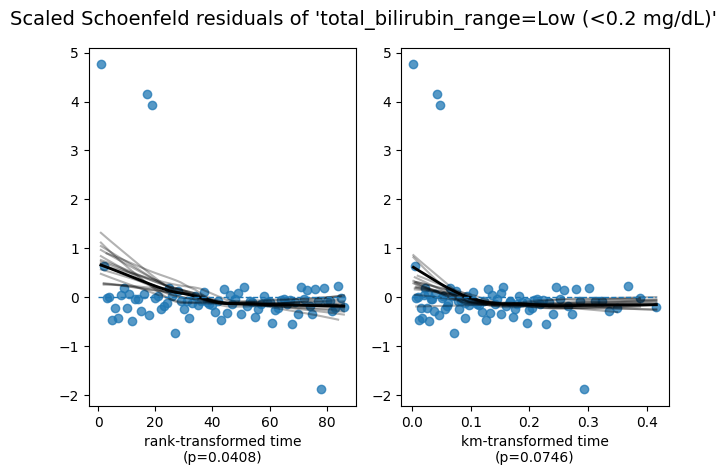

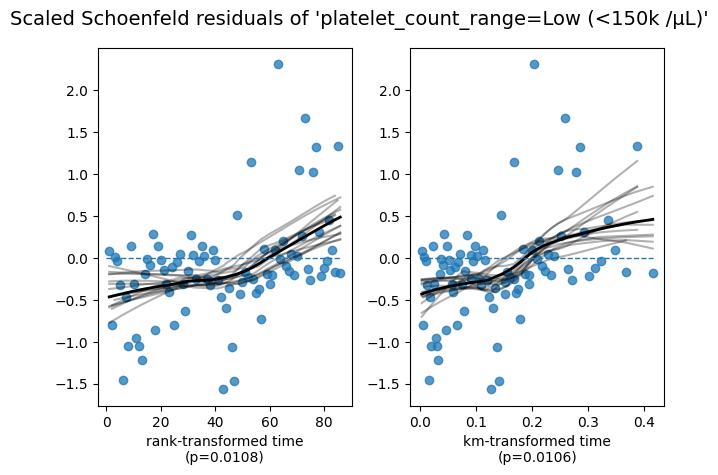

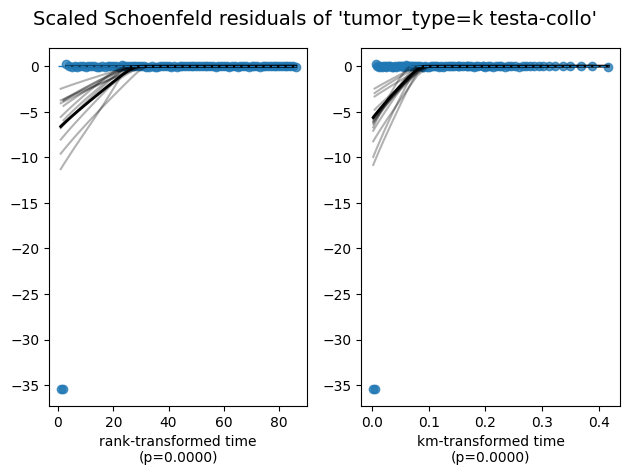

In [25]:
# =======================================
# Check Proportional Hazards Assumption
# =======================================
from lifelines.statistics import proportional_hazard_test
import pandas as pd

# Run PH test
ph_res = proportional_hazard_test(cph, df, time_transform="rank")
ph_tbl = ph_res.summary.copy()

# Inspect columns and pick the p-value column robustly
print("\nPH table columns:", list(ph_tbl.columns))

# Pick a p column by heuristic (supports lifelines variants)
p_candidates = [c for c in ph_tbl.columns if c.lower().strip().startswith("p")]
if not p_candidates:
    # fallback: any column that contains 'p' (e.g., 'p value')
    p_candidates = [c for c in ph_tbl.columns if 'p' in c.lower()]
if not p_candidates:
    raise RuntimeError("Could not find a p-value column in PH test summary.")

pcol = p_candidates[0]

# Print full table sorted by p
print("\n--- Proportional Hazards test (sorted by p) ---")
print(ph_tbl.sort_values(pcol))

# Global row if present
if isinstance(ph_tbl.index, pd.Index) and 'global' in ph_tbl.index:
    print(f"\nGlobal PH p-value: {ph_tbl.loc['global', pcol]:.4g}")
else:
    print("\nGlobal PH row not present in this lifelines version. Reporting per-variable results only.")

# Violators
violators = ph_tbl[ph_tbl[pcol] < 0.05].sort_values(pcol)
if len(violators):
    print("\nVariables with evidence of PH violation (p < 0.05):")
    print(violators[[pcol]])
else:
    print("\nNo significant PH violations detected.")

# Optional: show diagnostic plots for top 3 smallest p-values (if available)
to_plot = [ix for ix in ph_tbl.sort_values(pcol).index.tolist() if ix != 'global'][:3]
if len(to_plot):
    cph.check_assumptions(df, p_value_threshold=0.05, show_plots=True, columns=to_plot)


In [26]:
# =======================================
# Export PH Test Results
# =======================================

# 1. Export full PH table
ph_tbl.to_excel("cox_PH_test_results.xlsx", sheet_name="PH_Test", index=True)
ph_tbl.to_csv("cox_PH_test_results.csv", index=True)

print("\nSaved: cox_PH_test_results.xlsx and .csv")

# 2. Export variables with PH violation (if any)
if len(violators):
    violators.to_excel("cox_PH_violators_p_lt_0.05.xlsx", sheet_name="Violators", index=True)
    violators.to_csv("cox_PH_violators_p_lt_0.05.csv", index=True)
    print("Saved: cox_PH_violators_p_lt_0.05.xlsx and .csv")
else:
    print("No PH violators to export.")

# 3. Export global p-value if available
if 'global' in ph_tbl.index:
    global_p = ph_tbl.loc['global', pcol]
    gp = pd.DataFrame({"Global_PH_p_value":[global_p]})
    gp.to_excel("cox_global_PH_p_value.xlsx", index=False)
    print("Saved: cox_global_PH_p_value.xlsx")



Saved: cox_PH_test_results.xlsx and .csv
Saved: cox_PH_violators_p_lt_0.05.xlsx and .csv


C:\Users\HP\AppData\Local\Temp\ipykernel_5648\4080258411.py:6: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  ph_tbl.to_excel("cox_PH_test_results.xlsx", sheet_name="PH_Test", index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_5648\4080258411.py:13: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  violators.to_excel("cox_PH_violators_p_lt_0.05.xlsx", sheet_name="Violators", index=True)


In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import WeibullAFTFitter
from lifelines.utils import concordance_index
import pandas.api.types as ptypes

# -------------------------------------------------------------------
# 0) Paths and base dataframe
# -------------------------------------------------------------------
BASE_DIR = out_path = r"C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model"
OUT_DIR = os.path.join(BASE_DIR, "survival_models")
os.makedirs(OUT_DIR, exist_ok=True)

# starting point
dataset = death_df.copy()

# -------------------------------------------------------------------
# 1) Event indicator and survival time
# -------------------------------------------------------------------
# Ensure death_event exists (0 = censored, 1 = death)
if "death_event" not in dataset.columns:
    if "death_outcome" not in dataset.columns:
        raise ValueError("death_outcome column is required to derive death_event.")
    dataset["death_event"] = (
        dataset["death_outcome"]
        .astype(str)
        .str.strip()
        .str.lower()
        .map({
            "present / yes": 1,
            "present/yes": 1,
            "present": 1,
            "yes": 1,
            "y": 1,
            "1": 1,
            "absent / no": 0,
            "absent/no": 0,
            "absent": 0,
            "no": 0,
            "n": 0,
            "0": 0
        })
    )

# Survival time
if "survival_days" not in dataset.columns:
    for dcol in ["observation_start_date", "death_date", "observation_end_date"]:
        if dcol in dataset.columns:
            dataset[dcol] = pd.to_datetime(dataset[dcol], errors="coerce")

    if "observation_start_date" not in dataset.columns:
        raise ValueError("survival_days missing and observation_start_date not available to recompute it.")

    censor_date = (
        dataset["observation_end_date"].where(
            dataset["observation_end_date"].notna(),
            pd.Timestamp.today()
        )
        if "observation_end_date" in dataset.columns
        else pd.Series(pd.Timestamp.today(), index=dataset.index)
    )
    event_date = (
        dataset["death_date"].where(dataset["death_date"].notna(), censor_date)
        if "death_date" in dataset.columns
        else censor_date
    )
    dataset["survival_days"] = (event_date - dataset["observation_start_date"]).dt.days

dataset["survival_days"] = pd.to_numeric(dataset["survival_days"], errors="coerce")
dataset.loc[dataset["survival_days"] <= 0, "survival_days"] = np.nan

# -------------------------------------------------------------------
# 2) New covariate list (your list)
# -------------------------------------------------------------------
aft_features_raw = [
   # Demographics & socio-economic
    "age_group",
    "gender",
    "ethnicity",
    "education_level",
    "employment_status",
    "bmi_category",
    "smoking_status_detail",
    "alcohol_consumption",

    # Frailty / vulnerability
    "IPB",
    "fi_lab_category",

    # Comorbidity burden
    "cci_score",
    "anemia_comorbidity",
    "asthma",
    "atrial_fibrillation",
    "copd",
    "depressive_syndrome",
    "diabete_tipo_II",
    "dyslipidemia",
    "hypertension",
    "hypertensive_heart_disease",
    "ischemic_heart_disease",
    "renal_insufficiency",
    "obesity_comorbidity",
    "psychiatric_disorders",
    "cardiovascular_disorders",
    "cerebrovascular_disorders",
    "gastrointestinal_disorders",
    "gastroesophageal_reflux_full",
    "aortic_insufficiency",

    # Baseline laboratory ranges
    "alt_gpt_range",
    "ast_got_range",
    "creatinine_range",
    "direct_bilirubin_range",
    "total_bilirubin_range",
    "hemoglobin_range",
    "platelet_count_range",
    "white_blood_cells_range",
    "red_blood_cells_range",
    "neutrophils_percent_range",

    # Oncological baseline characteristics
    "tumor_type",
    "molecular_alterations",
    "mutations_present",
    "genotipo_DPYD_type",
    "radiotherapy_status",
    "surgical_intervention",
    "time_from_diagnosis_to_first_treatment_days"
]

# keep only those actually present in the dataframe
aft_features_raw = [c for c in aft_features_raw if c in dataset.columns]
print(f"Weibull AFT: using {len(aft_features_raw)} covariates from the supplied list.")

# -------------------------------------------------------------------
# 3) Work out types: numeric vs binary vs categorical
# -------------------------------------------------------------------
# 3a) numeric candidates from dtypes
numeric_candidate = [
    c for c in aft_features_raw
    if ptypes.is_numeric_dtype(dataset[c])
]

# 3b) variables that look binary yes/no (based on your variable meanings)
binary_candidates = [
    "death_during_observation", "surgical_intervention",
    "any_dose_reduction", "any_toxicity", "surgery_complications",
    "end_due_to_progression", "end_reason_progression_any_line",
    "end_reason_other_any_line",
    "hypertension", "aortic_insufficiency", "dyslipidemia",
    "obesity_comorbidity", "ischemic_heart_disease",
    "atrial_fibrillation", "copd", "asthma",
    "diabete_tipo_II",  
    "gastroesophageal_reflux_full", "hypertensive_heart_disease",
    "renal_insufficiency", "depressive_syndrome",
    "anemia_comorbidity", "psychiatric_disorders",
    "cardiovascular_disorders", "gastrointestinal_disorders",
    "cerebrovascular_disorders",
    "radiotherapy_status", "fi_available",
    "received_cardiotoxic_drug", "received_chemo",
    "received_hematotoxic_drug", "received_nephrotoxic_drug",
    "received_neurotoxic_drug", "received_targeted_therapy"
]
binary_like = [c for c in binary_candidates if c in aft_features_raw]

# 3c) categorical factors = remaining object columns
factor_cols = [
    c for c in aft_features_raw
    if c not in numeric_candidate and c not in binary_like
    and ptypes.is_object_dtype(dataset[c])
]

print(f"Numeric: {len(numeric_candidate)}, Binary-like: {len(binary_like)}, Factors: {len(factor_cols)}")

# -------------------------------------------------------------------
# 4) Build modelling dataframe
# -------------------------------------------------------------------
aft_df = dataset[["survival_days", "death_event"] + aft_features_raw].copy()

# 4a) numeric columns: coerce + median impute
for c in numeric_candidate:
    aft_df[c] = pd.to_numeric(aft_df[c], errors="coerce")
    if aft_df[c].notna().any():
        aft_df[c] = aft_df[c].fillna(aft_df[c].median())

# 4b) binary mapping with fill for binary_like object columns
yes_no_map = {
    "present / yes": 1, "yes": 1, "present": 1, "positive": 1, "y": 1, True: 1, 1: 1, "1": 1,
    "absent / no": 0, "no": 0, "absent": 0, "negative": 0, "n": 0, False: 0, 0: 0, "0": 0
}
for c in binary_like:
    s = aft_df[c].astype(str).str.strip().str.lower().replace(yes_no_map)
    aft_df[c] = pd.to_numeric(s, errors="coerce").fillna(0.0)

# 4c) one-hot encode factor columns (keep only reasonably sized factors)
if factor_cols:
    small_factor_cols = []
    for c in factor_cols:
        n_lev = dataset[c].nunique(dropna=True)
        if n_lev <= 50:   # avoid exploding extremely high-cardinality text fields
            small_factor_cols.append(c)
        else:
            print(f"Skipping factor {c} (too many levels: {n_lev})")

    if small_factor_cols:
        dummies = pd.get_dummies(
            aft_df[small_factor_cols],
            drop_first=True,
            dummy_na=True,
            prefix=small_factor_cols
        )
        aft_df = pd.concat([aft_df.drop(columns=small_factor_cols), dummies], axis=1)

# 4d) drop all-NaN or constant covariates
aft_df = aft_df.dropna(axis=1, how="all")
const_cols = [
    c for c in aft_df.columns
    if c not in ["survival_days", "death_event"]
    and aft_df[c].nunique(dropna=True) <= 1
]
if const_cols:
    aft_df = aft_df.drop(columns=const_cols)

# 4e) final cleaning
aft_df = aft_df.dropna(subset=["survival_days", "death_event"])
aft_df["death_event"] = pd.to_numeric(aft_df["death_event"], errors="coerce").astype(int)
aft_df = aft_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

n_rows = len(aft_df)
n_events = int((aft_df["death_event"] == 1).sum())
n_cens = int((aft_df["death_event"] == 0).sum())
print(f"AFT rows: {n_rows}, events: {n_events}, censored: {n_cens}")

if n_rows == 0:
    raise ValueError("AFT dataset is empty after cleaning.")
if n_events == 0:
    raise ValueError("No death events in AFT dataset.")
if n_cens == 0:
    raise ValueError("No censored observations in AFT dataset.")

# -------------------------------------------------------------------
# 5) Fit Weibull AFT model
# -------------------------------------------------------------------
aft = WeibullAFTFitter(penalizer=0.5)

covariate_cols = [c for c in aft_df.columns if c not in ["survival_days", "death_event"]]

# ensure predictors are numeric
for c in covariate_cols:
    aft_df[c] = pd.to_numeric(aft_df[c], errors="coerce")
aft_df = aft_df.dropna(subset=covariate_cols)

aft.fit(
    aft_df[["survival_days", "death_event"] + covariate_cols],
    duration_col="survival_days",
    event_col="death_event"
)

# -------------------------------------------------------------------
# 6) Tidy summary, compute Time Ratios, and save
# -------------------------------------------------------------------
aft_summary = aft.summary.copy()

# Flatten MultiIndex (param, covariate) if present
if isinstance(aft_summary.index, pd.MultiIndex):
    idx_names = list(aft_summary.index.names)
    aft_summary = aft_summary.reset_index()
    if len(idx_names) >= 1 and idx_names[0] is not None:
        aft_summary.rename(columns={idx_names[0]: "param"}, inplace=True)
    if len(idx_names) >= 2 and idx_names[1] is not None:
        aft_summary.rename(columns={idx_names[1]: "covariate"}, inplace=True)
    if "param" not in aft_summary.columns and "level_0" in aft_summary.columns:
        aft_summary.rename(columns={"level_0": "param"}, inplace=True)
    if "covariate" not in aft_summary.columns and "level_1" in aft_summary.columns:
        aft_summary.rename(columns={"level_1": "covariate"}, inplace=True)
else:
    if "param" not in aft_summary.columns:
        aft_summary["param"] = "lambda_"
    if "covariate" not in aft_summary.columns:
        aft_summary["covariate"] = aft_summary.index.astype(str)

aft_summary["Time_Ratio"] = np.exp(aft_summary["coef"])

lambda_df = aft_summary[
    aft_summary["param"].astype(str).str.contains("lambda", case=False, na=False)
].copy()

summary_path = os.path.join(OUT_DIR, "weibull_aft_death_model_summary_covset.xlsx")
lambda_path = os.path.join(OUT_DIR, "weibull_aft_death_lambda_terms_covset.xlsx")

aft_summary.to_excel(summary_path, index=False)
lambda_df.to_excel(lambda_path, index=False)

print("Weibull AFT full summary saved to:", summary_path)
print("Weibull AFT lambda terms saved to:", lambda_path)

# -------------------------------------------------------------------
# 7) Plot coefficients (lambda terms only)
# -------------------------------------------------------------------
if not lambda_df.empty:
    lambda_df = lambda_df.sort_values("coef", ascending=False)
    labels = lambda_df["covariate"].astype(str).tolist()

    plt.figure(figsize=(8, max(6, 0.3 * len(labels))))
    plt.barh(labels, lambda_df["coef"].values)
    plt.gca().invert_yaxis()
    plt.xlabel("Coefficient (log time)")
    plt.title("Weibull AFT - Coefficients (lambda terms) - Death Outcome")
    plt.tight_layout()
    coef_path = os.path.join(OUT_DIR, "weibull_aft_death_coefficients_covset.png")
    plt.savefig(coef_path, dpi=200)
    plt.close()
    print("Weibull AFT coefficient plot saved to:", coef_path)
else:
    print("No lambda_ rows found in AFT summary. Skipping coefficient plot.")

# -------------------------------------------------------------------
# 8) Concordance (using predicted median survival as ranking)
# -------------------------------------------------------------------
X = aft_df[covariate_cols]
pred_median = aft.predict_median(X)
c_index = concordance_index(
    aft_df["survival_days"],
    -pred_median,
    event_observed=aft_df["death_event"]
)
print(f"Weibull AFT Concordance index (death outcome): {c_index:.3f}")


Weibull AFT: using 45 covariates from the supplied list.
Numeric: 8, Binary-like: 20, Factors: 21
AFT rows: 406, events: 86, censored: 320


C:\Users\HP\AppData\Local\Temp\ipykernel_5648\1369223025.py:196: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s = aft_df[c].astype(str).str.strip().str.lower().replace(yes_no_map)
C:\Users\HP\AppData\Local\Temp\ipykernel_5648\1369223025.py:196: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s = aft_df[c].astype(str).str.strip().str.lower().replace(yes_no_map)
C:\Users\HP\AppData\Local\Temp\ipykernel_5648\1369223025.py:196: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To re

Weibull AFT full summary saved to: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\weibull_aft_death_model_summary_covset.xlsx
Weibull AFT lambda terms saved to: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\weibull_aft_death_lambda_terms_covset.xlsx
Weibull AFT coefficient plot saved to: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\weibull_aft_death_coefficients_covset.png
Weibull AFT Concordance index (death outcome): 0.215


In [29]:
import os
import numpy as np
import pandas as pd
from lifelines import CoxPHFitter, WeibullAFTFitter
from lifelines.utils import concordance_index
import pandas.api.types as ptypes

# -------------------------------------------------------------------
# 0) Base dataset
# -------------------------------------------------------------------
dataset = death_df.copy()

# Ensure death_event exists (0 = censored, 1 = death)
if "death_event" not in dataset.columns:
    if "death_outcome" not in dataset.columns:
        raise ValueError("death_outcome column is required to derive death_event.")
    dataset["death_event"] = (
        dataset["death_outcome"]
        .astype(str)
        .str.strip()
        .str.lower()
        .map({
            "present / yes": 1, "present/yes": 1, "present": 1,
            "yes": 1, "y": 1, "1": 1,
            "absent / no": 0, "absent/no": 0, "absent": 0,
            "no": 0, "n": 0, "0": 0
        })
    )

# Ensure survival_days is numeric and >0
if "survival_days" not in dataset.columns:
    raise ValueError("survival_days must be present in death_df for survival models.")

dataset["survival_days"] = pd.to_numeric(dataset["survival_days"], errors="coerce")
dataset.loc[dataset["survival_days"] <= 0, "survival_days"] = np.nan

# Drop rows with no time or event
dataset = dataset.dropna(subset=["survival_days", "death_event"])

# -------------------------------------------------------------------
# 1) Cox: screened predictors
# -------------------------------------------------------------------
cox_features_raw = [
   # Demographics & socio-economic
    "age_group",
    "gender",
    "ethnicity",
    "education_level",
    "employment_status",
    "bmi_category",
    "smoking_status_detail",
    "alcohol_consumption",

    # Frailty / vulnerability
    "IPB",
    "fi_lab_category",

    # Comorbidity burden
    "cci_score",
    "anemia_comorbidity",
    "asthma",
    "atrial_fibrillation",
    "copd",
    "depressive_syndrome",
    "diabete_tipo_II",
    "dyslipidemia",
    "hypertension",
    "hypertensive_heart_disease",
    "ischemic_heart_disease",
    "renal_insufficiency",
    "obesity_comorbidity",
    "psychiatric_disorders",
    "cardiovascular_disorders",
    "cerebrovascular_disorders",
    "gastrointestinal_disorders",
    "gastroesophageal_reflux_full",
    "aortic_insufficiency",

    # Baseline laboratory ranges
    "alt_gpt_range",
    "ast_got_range",
    "creatinine_range",
    "direct_bilirubin_range",
    "total_bilirubin_range",
    "hemoglobin_range",
    "platelet_count_range",
    "white_blood_cells_range",
    "red_blood_cells_range",
    "neutrophils_percent_range",

    # Oncological baseline characteristics
    "tumor_type",
    "molecular_alterations",
    "mutations_present",
    "genotipo_DPYD_type",
    "radiotherapy_status",
    "surgical_intervention",
    "time_from_diagnosis_to_first_treatment_days"
]

cox_features_raw = [c for c in cox_features_raw if c in dataset.columns]
print(f"Cox: {len(cox_features_raw)} screened predictors present in death_df.")

# -------------------------------------------------------------------
# 2) Build Cox modelling dataframe
# -------------------------------------------------------------------
def build_cox_df(raw: pd.DataFrame, feature_list):

    df = raw[["survival_days", "death_event"] + feature_list].copy()

    # strata variables (if present in raw)
    strata_cols = []
    for col in ["tumor_stage_tnm", "observation_end_reason"]:
        if col in raw.columns:
            df[col] = raw[col]
            strata_cols.append(col)

    # map for yes/no style
    yes_no_map = {
        "present / yes": 1, "present/yes": 1, "present": 1,
        "yes": 1, "y": 1, "positive": 1,
        "absent / no": 0, "absent/no": 0, "absent": 0,
        "no": 0, "n": 0, "negative": 0
    }

    # binary variables (conceptually)
    binary_candidates = [
        "any_dose_reduction", "any_toxicity", "hypertension",
        "aortic_insufficiency", "dyslipidemia", "obesity_comorbidity",
        "ischemic_heart_disease", "atrial_fibrillation", "copd", "asthma",
        "diabete_tipo_II", "gastroesophageal_reflux_full",
        "hypertensive_heart_disease", "renal_insufficiency",
        "depressive_syndrome", "anemia_comorbidity", "psychiatric_disorders",
        "cardiovascular_disorders", "gastrointestinal_disorders",
        "cerebrovascular_disorders", "radiotherapy_status", "fi_available",
        "received_cardiotoxic_drug", "received_chemo",
        "received_hematotoxic_drug", "received_nephrotoxic_drug",
        "received_neurotoxic_drug", "received_targeted_therapy",
        "end_due_to_progression", "end_reason_progression_any_line",
        "end_reason_other_any_line", "surgical_intervention"
    ]
    binary_like = [c for c in binary_candidates if c in df.columns]

    # numeric from dtype
    numeric_candidate = [
        c for c in feature_list
        if c in raw.columns and ptypes.is_numeric_dtype(raw[c])
    ]

    # factors (objects that are not binary and not strata)
    factor_cols = [
        c for c in feature_list
        if c not in binary_like
        and c not in numeric_candidate
        and c not in strata_cols
        and c in raw.columns
        and ptypes.is_object_dtype(raw[c])
    ]

    print("Cox numeric:", numeric_candidate)
    print("Cox binary:", binary_like)
    print("Cox factors:", factor_cols)
    print("Cox strata (candidate):", strata_cols)

    # numeric: coerce + median impute
    for c in numeric_candidate:
        df[c] = pd.to_numeric(df[c], errors="coerce")
        if df[c].notna().any():
            df[c] = df[c].fillna(df[c].median())

    # binary: yes/no mapping if object
    for c in binary_like:
        if c in df.columns and ptypes.is_object_dtype(raw[c]):
            lower = df[c].astype(str).str.lower().str.strip().replace(yes_no_map)
            df[c] = pd.to_numeric(lower, errors="coerce").fillna(0.0)

    # factors: collapse rare levels, then dummies
    small_factors = []
    for c in factor_cols:
        vc = df[c].value_counts(dropna=False)
        rare = vc[vc < 5].index
        df[c] = df[c].replace(rare, "RARE")
        n_lev = df[c].nunique(dropna=True)
        if n_lev <= 50:
            small_factors.append(c)
        else:
            print(f"Cox: skipping high-cardinality factor {c} with {n_lev} levels.")

    if small_factors:
        dummies = pd.get_dummies(
            df[small_factors],
            drop_first=True, dummy_na=True, prefix=small_factors
        )
        df = pd.concat([df.drop(columns=small_factors), dummies], axis=1)

    # drop all-NaN or near-constant predictors
    df = df.dropna(axis=1, how="all")
    events = df["death_event"] == 1

    drop_cols = []
    for c in df.columns:
        if c in ["survival_days", "death_event"] + strata_cols:
            continue
        if df[c].nunique(dropna=True) <= 1:
            drop_cols.append(c)
        else:
            if df.loc[events, c].nunique(dropna=True) <= 1:
                drop_cols.append(c)
            elif df.loc[~events, c].nunique(dropna=True) <= 1:
                drop_cols.append(c)

    if drop_cols:
        print("Cox: dropping near-constant columns:", drop_cols)
        df = df.drop(columns=list(set(drop_cols)))

    # cast predictors to float
    for c in df.columns:
        if c not in ["survival_days", "death_event"] + strata_cols:
            df[c] = pd.to_numeric(df[c], errors="coerce")

    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(subset=["survival_days", "death_event"])
    df["death_event"] = df["death_event"].astype(int)
    df = df.dropna(axis=0)

    return df, strata_cols

cox_df, cox_strata = build_cox_df(dataset, cox_features_raw)
print(f"Cox DF shape: {cox_df.shape}, strata candidates: {cox_strata}")

# -------------------------------------------------------------------
# 3) Build AFT dataframe
# -------------------------------------------------------------------
aft_features_raw = [
    # Demographics & socio-economic
    "age_group",
    "gender",
    "ethnicity",
    "education_level",
    "employment_status",
    "bmi_category",
    "smoking_status_detail",
    "alcohol_consumption",

    # Frailty / vulnerability
    "IPB",
    "fi_lab_category",

    # Comorbidity burden
    "cci_score",
    "anemia_comorbidity",
    "asthma",
    "atrial_fibrillation",
    "copd",
    "depressive_syndrome",
    "diabete_tipo_II",
    "dyslipidemia",
    "hypertension",
    "hypertensive_heart_disease",
    "ischemic_heart_disease",
    "renal_insufficiency",
    "obesity_comorbidity",
    "psychiatric_disorders",
    "cardiovascular_disorders",
    "cerebrovascular_disorders",
    "gastrointestinal_disorders",
    "gastroesophageal_reflux_full",
    "aortic_insufficiency",

    # Baseline laboratory ranges
    "alt_gpt_range",
    "ast_got_range",
    "creatinine_range",
    "direct_bilirubin_range",
    "total_bilirubin_range",
    "hemoglobin_range",
    "platelet_count_range",
    "white_blood_cells_range",
    "red_blood_cells_range",
    "neutrophils_percent_range",

    # Oncological baseline characteristics
    "tumor_type",
    "molecular_alterations",
    "mutations_present",
    "genotipo_DPYD_type",
    "radiotherapy_status",
    "surgical_intervention",
    "time_from_diagnosis_to_first_treatment_days"
]
aft_features_raw = [c for c in aft_features_raw if c in dataset.columns]
print(f"AFT: {len(aft_features_raw)} covariates present in death_df.")

aft_df = dataset[["survival_days", "death_event"] + aft_features_raw].copy()

numeric_candidate_aft = [
    c for c in aft_features_raw
    if ptypes.is_numeric_dtype(dataset[c])
]

binary_like_aft = [
    c for c in [
        "death_during_observation", "surgical_intervention",
        "surgery_complications", "end_reason_progression_any_line"
    ] if c in aft_features_raw
]

factor_cols_aft = [
    c for c in aft_features_raw
    if c not in numeric_candidate_aft
    and c not in binary_like_aft
    and ptypes.is_object_dtype(dataset[c])
]

print("AFT numeric:", numeric_candidate_aft)
print("AFT binary:", binary_like_aft)
print("AFT factors:", factor_cols_aft)

# numeric: coerce + median impute
for c in numeric_candidate_aft:
    aft_df[c] = pd.to_numeric(aft_df[c], errors="coerce")
    if aft_df[c].notna().any():
        aft_df[c] = aft_df[c].fillna(aft_df[c].median())

# binary mapping
yes_no_map = {
    "present / yes": 1, "present/yes": 1, "present": 1,
    "yes": 1, "y": 1, "positive": 1,
    "absent / no": 0, "absent/no": 0, "absent": 0,
    "no": 0, "n": 0, "negative": 0
}
for c in binary_like_aft:
    s = aft_df[c].astype(str).str.lower().str.strip().replace(yes_no_map)
    aft_df[c] = pd.to_numeric(s, errors="coerce").fillna(0.0)

# factors → dummies
small_factors_aft = []
for c in factor_cols_aft:
    vc = aft_df[c].value_counts(dropna=False)
    rare = vc[vc < 5].index
    aft_df[c] = aft_df[c].replace(rare, "RARE")
    n_lev = aft_df[c].nunique(dropna=True)
    if n_lev <= 50:
        small_factors_aft.append(c)
    else:
        print(f"AFT: skipping high-cardinality factor {c} with {n_lev} levels.")

if small_factors_aft:
    dummies = pd.get_dummies(
        aft_df[small_factors_aft],
        drop_first=True, dummy_na=True, prefix=small_factors_aft
    )
    aft_df = pd.concat([aft_df.drop(columns=small_factors_aft), dummies], axis=1)

aft_df = aft_df.replace([np.inf, -np.inf], np.nan)
aft_df = aft_df.dropna(subset=["survival_days", "death_event"])
aft_df["death_event"] = aft_df["death_event"].astype(int)
aft_df = aft_df.dropna(axis=0)

print(f"AFT DF shape: {aft_df.shape}")

# -------------------------------------------------------------------
# 4) Fit Cox and Weibull AFT
# -------------------------------------------------------------------
# Cox PH with safe strata handling
strata_cols_fit = [c for c in cox_strata if c in cox_df.columns]
print("Strata columns used in Cox model:", strata_cols_fit)
if len(strata_cols_fit) == 0:
    strata_cols_fit = None  # avoid empty-list error in lifelines

cph = CoxPHFitter(penalizer=1.5)
cph.fit(
    cox_df,
    duration_col="survival_days",
    event_col="death_event",
    strata=strata_cols_fit,
    robust=True
)
print("Cox PH fitted. C-index:", cph.concordance_index_)

# Weibull AFT
aft = WeibullAFTFitter(penalizer=0.5)
covs_aft = [c for c in aft_df.columns if c not in ["survival_days", "death_event"]]

for c in covs_aft:
    aft_df[c] = pd.to_numeric(aft_df[c], errors="coerce")
aft_df = aft_df.dropna(subset=covs_aft)

aft.fit(
    aft_df[["survival_days", "death_event"] + covs_aft],
    duration_col="survival_days",
    event_col="death_event"
)
print("Weibull AFT fitted.")

# Concordance for AFT
pred_med = aft.predict_median(aft_df[covs_aft])
c_idx_aft = concordance_index(
    aft_df["survival_days"],
    -pred_med,
    event_observed=aft_df["death_event"]
)
print(f"Weibull AFT C-index (death): {c_idx_aft:.3f}")


Cox: 45 screened predictors present in death_df.
Cox numeric: ['IPB', 'cci_score', 'diabete_tipo_II', 'hypertensive_heart_disease', 'gastroesophageal_reflux_full', 'genotipo_DPYD_type', 'radiotherapy_status', 'time_from_diagnosis_to_first_treatment_days']
Cox binary: ['hypertension', 'aortic_insufficiency', 'dyslipidemia', 'obesity_comorbidity', 'ischemic_heart_disease', 'atrial_fibrillation', 'copd', 'asthma', 'diabete_tipo_II', 'gastroesophageal_reflux_full', 'hypertensive_heart_disease', 'renal_insufficiency', 'depressive_syndrome', 'anemia_comorbidity', 'psychiatric_disorders', 'cardiovascular_disorders', 'gastrointestinal_disorders', 'cerebrovascular_disorders', 'radiotherapy_status', 'surgical_intervention']
Cox factors: ['age_group', 'gender', 'ethnicity', 'education_level', 'employment_status', 'bmi_category', 'smoking_status_detail', 'alcohol_consumption', 'alt_gpt_range', 'ast_got_range', 'creatinine_range', 'direct_bilirubin_range', 'total_bilirubin_range', 'hemoglobin_range

C:\Users\HP\AppData\Local\Temp\ipykernel_5648\1237301610.py:174: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lower = df[c].astype(str).str.lower().str.strip().replace(yes_no_map)
C:\Users\HP\AppData\Local\Temp\ipykernel_5648\1237301610.py:174: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lower = df[c].astype(str).str.lower().str.strip().replace(yes_no_map)
C:\Users\HP\AppData\Local\Temp\ipykernel_5648\1237301610.py:174: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To re

AFT DF shape: (406, 114)
Strata columns used in Cox model: []
Cox PH fitted. C-index: 0.7592209665785045
Weibull AFT fitted.
Weibull AFT C-index (death): 0.221


C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

In [30]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from lifelines import CoxPHFitter, WeibullAFTFitter

# -------------------------------------------------------------------
# Paths
# -------------------------------------------------------------------
BASE_DIR = r"C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model"
OUT_DIR = os.path.join(BASE_DIR, "survival_models")
os.makedirs(OUT_DIR, exist_ok=True)

# -------------------------------------------------------------------
# Clinician-facing settings
#   - drop artefacts like *_nan, *_RARE (missingness / sparse categories)
#   - keep plot readable (short labels, top-N)
# -------------------------------------------------------------------
EXCLUDE_REGEX = r"(_nan\b|_RARE\b)"   # add more patterns if needed
TOP_N = 15

# Optional: nicer labels (add/adjust as you like)
def pretty_label(v: str) -> str:
    if v is None:
        return ""
    s = str(v)

    # common cleanup
    s = s.replace("_", " ")
    s = s.replace("Maschi", "Male").replace("Femmine", "Female")

    # short lab phrases (examples)
    s = s.replace("white blood cells range", "WBC range")
    s = s.replace("red blood cells range", "RBC range")
    s = s.replace("hemoglobin range", "Hb range")
    s = s.replace("platelet count range", "Platelets range")
    s = s.replace("neutrophils percent range", "Neutrophils range")

    # trim repeated spaces
    s = re.sub(r"\s+", " ", s).strip()
    return s

# -------------------------------------------------------------------
# Helper Functions
# -------------------------------------------------------------------
def tidy_cox_effects(cph_model: CoxPHFitter) -> pd.DataFrame:
    s = cph_model.summary.copy()
    s = s.replace([np.inf, -np.inf], np.nan).dropna(subset=["coef"])
    s["variable"] = s.index.astype(str)
    s = s[~s["variable"].str.contains("Intercept", case=False, na=False)]
    s["HR"] = np.exp(s["coef"])
    s["log_effect"] = np.abs(s["coef"])
    s["Model"] = "CoxPH"
    # ensure CI columns exist
    for col in ["coef lower 95%", "coef upper 95%"]:
        if col not in s.columns:
            s[col] = np.nan
    return s[["variable", "coef", "HR", "log_effect", "coef lower 95%", "coef upper 95%", "Model"]]


def tidy_aft_effects(aft_model: WeibullAFTFitter) -> pd.DataFrame:
    summ = aft_model.summary.copy()

    # lifelines AFT summary usually has MultiIndex with "lambda_" and "rho_"
    if isinstance(summ.index, pd.MultiIndex):
        summ = summ.reset_index()
        # Try to identify covariate names
        if "covariate" in summ.columns:
            summ["variable"] = summ["covariate"].astype(str)
        else:
            # fallback: second column often stores covariates
            summ["variable"] = summ[summ.columns[1]].astype(str)
        # Identify parameter column (lambda_/rho_)
        if "param" in summ.columns:
            summ["param"] = summ["param"].astype(str)
        elif "index" in summ.columns:
            summ["param"] = summ["index"].astype(str)
        else:
            # fallback to first column
            summ["param"] = summ[summ.columns[0]].astype(str)
    else:
        summ["variable"] = summ.index.astype(str)
        summ["param"] = ""

    # Keep only lambda_ terms (the covariate effects on log time)
    lam = summ.copy()
    if "param" in lam.columns and lam["param"].nunique() > 1:
        lam = lam[lam["param"].str.contains("lambda", case=False, na=False)].copy()

    lam = lam[lam["variable"] != "Intercept"].copy()

    lam = lam.replace([np.inf, -np.inf], np.nan).dropna(subset=["coef"])

    lam["TR"] = np.exp(lam["coef"])
    lam["risk_effect"] = 1.0 / lam["TR"]
    lam["log_effect"] = np.abs(lam["coef"])
    lam["Model"] = "WeibullAFT"

    for col in ["coef lower 95%", "coef upper 95%"]:
        if col not in lam.columns:
            lam[col] = np.nan

    keep = ["variable", "coef", "TR", "risk_effect", "log_effect", "coef lower 95%", "coef upper 95%", "Model"]
    return lam[keep]


def bootstrap_coefs(df, model_class, duration_col, event_col, n_boot=100, random_state=42):
    mats = []
    rng = np.random.RandomState(random_state)

    for _ in range(n_boot):
        b = resample(df, replace=True, random_state=rng.randint(0, 10**9))
        try:
            if model_class is CoxPHFitter:
                m = CoxPHFitter(penalizer=1.0)
                m.fit(b, duration_col=duration_col, event_col=event_col)
                coefs = m.params_.copy()
            else:
                m = WeibullAFTFitter(penalizer=0.5)
                m.fit(b, duration_col=duration_col, event_col=event_col)
                # use lambda_ coefficients only
                coefs = m.params_.loc["lambda_"].copy()

            mats.append(coefs)
        except Exception:
            continue

    if not mats:
        return pd.DataFrame()

    M = pd.DataFrame(mats)
    return M.dropna(axis=1, how="all")


def winsorize(series: pd.Series, q=0.95) -> pd.Series:
    if series is None or series.dropna().empty:
        return series
    return series.clip(upper=series.quantile(q))


def compute_RI(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df["log_effect_w"] = winsorize(df["log_effect"], q=0.95)

    eps = 0.05
    score = (df["log_effect_w"] / (df["sd_coef"] + eps)) * df["sel_freq"]

    if score.max() > score.min():
        df["RI_model"] = (score - score.min()) / (score.max() - score.min())
    else:
        df["RI_model"] = 0.0
    return df


def apply_exclusions(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    # drop Intercept and artefacts
    df = df[~df["variable"].str.contains("Intercept", case=False, na=False)]
    df = df[~df["variable"].str.contains(EXCLUDE_REGEX, case=False, na=False)]
    return df


# -------------------------------------------------------------------
# PART 1: Extract Effects (expects you already have: cph, aft)
# -------------------------------------------------------------------
cox_eff = tidy_cox_effects(cph)
aft_eff = tidy_aft_effects(aft)

# Apply exclusions early (important for clinician-facing outputs)
cox_eff = apply_exclusions(cox_eff)
aft_eff = apply_exclusions(aft_eff)

# -------------------------------------------------------------------
# PART 2: Bootstrap Stability (expects you already have: cox_df, aft_df)
# -------------------------------------------------------------------
cox_boot = bootstrap_coefs(cox_df, CoxPHFitter, "survival_days", "death_event", n_boot=100)
aft_boot = bootstrap_coefs(aft_df, WeibullAFTFitter, "survival_days", "death_event", n_boot=100)

# Add stability columns ALWAYS
cox_eff["sd_coef"] = np.nan
cox_eff["sel_freq"] = np.nan
aft_eff["sd_coef"] = np.nan
aft_eff["sel_freq"] = np.nan

# Cox stability
if not cox_boot.empty:
    cox_sd = cox_boot.std(axis=0, skipna=True)
    cox_sel = cox_boot.notna().mean(axis=0)
    cox_eff["sd_coef"] = cox_eff["variable"].map(cox_sd)
    cox_eff["sel_freq"] = cox_eff["variable"].map(cox_sel)

# AFT stability
if not aft_boot.empty:
    aft_sd = aft_boot.std(axis=0, skipna=True)
    aft_sel = aft_boot.notna().mean(axis=0)
    aft_eff["sd_coef"] = aft_eff["variable"].map(aft_sd)
    aft_eff["sel_freq"] = aft_eff["variable"].map(aft_sel)

# Fill missing conservatively
for df_ in (cox_eff, aft_eff):
    df_["sd_coef"] = df_["sd_coef"].fillna(0.25)
    df_["sel_freq"] = df_["sel_freq"].fillna(0.5)

# -------------------------------------------------------------------
# PART 3: Compute RI per model
# -------------------------------------------------------------------
cox_eff = compute_RI(cox_eff)
aft_eff = compute_RI(aft_eff)

# -------------------------------------------------------------------
# PART 4: Merge & Combined RI
# -------------------------------------------------------------------
ri_all = pd.concat([cox_eff, aft_eff], ignore_index=True)

comb = ri_all.groupby("variable", as_index=False).agg(
    Combined_RI=("RI_model", "mean"),
    Models=("Model", lambda x: ", ".join(sorted(set(x)))),
    Mean_log_effect=("log_effect", "mean"),
    Mean_sd=("sd_coef", "mean"),
    Mean_sel=("sel_freq", "mean"),
)

ri_export = ri_all.merge(comb, on="variable", how="left")

ri_export_sorted = (
    ri_export
    .drop_duplicates(subset=["variable"])
    .sort_values("Combined_RI", ascending=False)
)

# Clinician-facing: exclude artefacts again (belt-and-braces)
ri_export_sorted = apply_exclusions(ri_export_sorted)

# Save table
ri_path = os.path.join(OUT_DIR, "RI_Significance_Table_robust_death_clean.xlsx")
ri_export_sorted.to_excel(ri_path, index=False)

# -------------------------------------------------------------------
# PART 5: Plot Top-N (clinician-facing)
# -------------------------------------------------------------------
top = ri_export_sorted.head(TOP_N).copy()
top["label"] = top["variable"].apply(pretty_label)

plt.figure(figsize=(10, 6.5))
plt.barh(top["label"], top["Combined_RI"])
plt.gca().invert_yaxis()
plt.xlabel("Relative Importance (Combined Cox + AFT)")
plt.title(f"Top {TOP_N} Predictors of Death Outcome (Robust RI, clinician-facing)")
plt.tight_layout()

plot_path = os.path.join(OUT_DIR, "RI_Significance_Top_clean_death.png")
plt.savefig(plot_path, dpi=300)
plt.close()

print("\nSUCCESS!")
print("Saved table:", ri_path)
print("Saved plot :", plot_path)


C:\Users\HP\AppData\Local\Temp\ipykernel_5648\3166531739.py:161: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[~df["variable"].str.contains(EXCLUDE_REGEX, case=False, na=False)]
C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penal

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\

C:\Users\HP\anaconda3\lib\site-packages\lifelines\fitters\__init__.py:2086: ApproximationWarning: The Hessian was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

Some ways to possible ways fix this:

0. Are there any lifelines warnings outputted during the `fit`?
1. Does a particularly large variable need to be centered to 0?
2. Inspect your DataFrame: does everything look as expected? Do you need to add/drop a constant (intercept) column?
3. Is there high-collinearity in the dataset? Try using the variance inflation factor (VIF) to find redundant variables.
4. Trying adding a small penalizer (or changing it, if already present). Example: `WeibullAFTFitter(penalizer=0.01).fit(...)`.
5. Are there any extreme outliers? Try modeling them or dropping them to see if it helps convergence.

  warnings.warn(warning_text, exceptions.ApproximationWarning)
C:\Users\HP\


SUCCESS!
Saved table: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\RI_Significance_Table_robust_death_clean.xlsx
Saved plot : C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\RI_Significance_Top_clean_death.png


In [31]:
# -------------------------------------------------------------------
# 8) Outputs (summary + readable hazard ratio plot)
# -------------------------------------------------------------------
summary_path = os.path.join(OUT_DIR, "coxph_death_model_summary_penalized.xlsx")
fitted.summary.to_excel(summary_path, index=True)
print("Cox PH summary saved to:", summary_path)

# --- REWRITE STARTS HERE: readable forest plot (Top-N) ---
import textwrap
import matplotlib.pyplot as plt
import numpy as np

fig_path = os.path.join(OUT_DIR, "coxph_death_hazard_ratios_penalized.png")

# pick top N terms by absolute effect size
TOP_N = 20

s = fitted.summary.copy()
s = s.replace([np.inf, -np.inf], np.nan).dropna(subset=["coef"])
s["feature"] = s.index.astype(str)

# drop intercept-like rows if any
s = s[~s["feature"].str.contains("Intercept", case=False, na=False)]

# sort by |coef| and keep top N
s = s.reindex(s["coef"].abs().sort_values(ascending=False).index).head(TOP_N)

# compute HR and CI on HR scale (lifelines summary already has coef CI)
s["HR"] = np.exp(s["coef"])
s["HR_low"] = np.exp(s["coef lower 95%"])
s["HR_high"] = np.exp(s["coef upper 95%"])

# shorter labels (wrap long category names)
def short_label(x, width=45):
    x = str(x)
    return "\n".join(textwrap.wrap(x, width=width)) if len(x) > width else x

labels = [short_label(v) for v in s["feature"]]

# dynamic figure height so labels don't overlap
fig_h = max(6, 0.45 * len(labels))
plt.figure(figsize=(10, fig_h))

ypos = np.arange(len(s))
plt.errorbar(
    x=s["HR"].values,
    y=ypos,
    xerr=[s["HR"].values - s["HR_low"].values, s["HR_high"].values - s["HR"].values],
    fmt="o",
    capsize=3
)

plt.yticks(ypos, labels)
plt.axvline(1.0, linestyle="--")
plt.xlabel("Hazard Ratio (95% CI)")
plt.title(f"Cox PH - Penalized Hazard Ratios (Top {TOP_N}) - Death Outcome")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(fig_path, dpi=300, bbox_inches="tight")
plt.close()

print("Readable hazard ratio plot saved to:", fig_path)

# optional: save the plotted Top-N table too (so you can report it)
topn_path = os.path.join(OUT_DIR, f"coxph_death_top{TOP_N}_HR_table.xlsx")
s[["coef", "HR", "HR_low", "HR_high", "p"]].to_excel(topn_path, index=False)
print("Top-N HR table saved to:", topn_path)

C:\Users\HP\AppData\Local\Temp\ipykernel_5648\1246803092.py:5: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  fitted.summary.to_excel(summary_path, index=True)


Cox PH summary saved to: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\coxph_death_model_summary_penalized.xlsx
Readable hazard ratio plot saved to: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\coxph_death_hazard_ratios_penalized.png
Top-N HR table saved to: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\coxph_death_top20_HR_table.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_5648\1246803092.py:66: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  s[["coef", "HR", "HR_low", "HR_high", "p"]].to_excel(topn_path, index=False)


In [33]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import fill

# ------------------------------------------------------------
# SETTINGS
# ------------------------------------------------------------
TOP_N = 20  # clinician-facing: 15-25 is usually the sweet spot
WRAP_WIDTH = 45
FIG_W = 11
FIG_H_PER_ROW = 0.45

# Change these paths if needed
BASE_DIR = r"C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model"
OUT_DIR = os.path.join(BASE_DIR, "survival_models")
os.makedirs(OUT_DIR, exist_ok=True)

# ------------------------------------------------------------
# 1) Clinician-facing filters
# ------------------------------------------------------------
ARTIFACT_PATTERNS = [
    r"_nan\b",
    r"\bnan\b",
    r"missing",
    r"not known",
    r"unknown",
    r"rare\b",
    r"dummy_na",
]

def is_artifact(name: str) -> bool:
    s = str(name).strip().lower()
    return any(re.search(p, s) for p in ARTIFACT_PATTERNS)

# Optional: remove very “admin” / non-clinical fields if they sneak in
NONCLINICAL_PATTERNS = [
    r"observation_end_reason",
    r"end_reason_",
    r"end_due_to_",
    r"death_during_observation",
]
def is_nonclinical(name: str) -> bool:
    s = str(name).strip().lower()
    return any(re.search(p, s) for p in NONCLINICAL_PATTERNS)

# ------------------------------------------------------------
# 2) Label cleaner (turn model variable names into readable labels)
# ------------------------------------------------------------
def clean_label(var: str) -> str:
    v = str(var)

    # Remove common one-hot prefixes like "alcohol_consumption_Yes, Moderate"
    v = v.replace("=", ": ")

    # Replace underscores with spaces
    v = v.replace("_", " ")

    # Make common lab names nicer
    v = re.sub(r"\bwhite blood cells\b", "WBC", v, flags=re.I)
    v = re.sub(r"\bred blood cells\b", "RBC", v, flags=re.I)
    v = re.sub(r"\bhemoglobin\b", "Hb", v, flags=re.I)
    v = re.sub(r"\bplatelet count\b", "Platelets", v, flags=re.I)
    v = re.sub(r"\bneutrophils percent\b", "Neutrophils", v, flags=re.I)
    v = re.sub(r"\bcreatinine\b", "Creatinine", v, flags=re.I)
    v = re.sub(r"\bdirect bilirubin\b", "Direct bilirubin", v, flags=re.I)
    v = re.sub(r"\btotal bilirubin\b", "Total bilirubin", v, flags=re.I)

    # Light cleanup of double spaces
    v = re.sub(r"\s+", " ", v).strip()

    # Wrap for plotting
    return fill(v, width=WRAP_WIDTH)

# ------------------------------------------------------------
# 3) Extract Cox PH effects in a plot-ready table
# ------------------------------------------------------------
def extract_cox_table(cph_model) -> pd.DataFrame:
    s = cph_model.summary.copy()
    s = s.replace([np.inf, -np.inf], np.nan).dropna(subset=["coef"])
    s["feature"] = s.index.astype(str)

    # lifelines provides coef CI. For HR CI we exponentiate
    s["HR"] = np.exp(s["coef"])
    s["HR_low"] = np.exp(s["coef lower 95%"])
    s["HR_high"] = np.exp(s["coef upper 95%"])

    # Keep a ranking statistic (absolute log(HR))
    s["rank_score"] = s["coef"].abs()

    # basic columns
    out = s[["feature", "coef", "HR", "HR_low", "HR_high", "p"]].copy()

    # Remove intercept-like terms and artifacts
    out = out[~out["feature"].str.contains("Intercept", case=False, na=False)]
    out = out[~out["feature"].apply(is_artifact)]
    out = out[~out["feature"].apply(is_nonclinical)]

    # Clinician label
    out["label"] = out["feature"].apply(clean_label)

    # Rank
    out["rank_score"] = out["coef"].abs()
    out = out.sort_values("rank_score", ascending=False)

    return out

# ------------------------------------------------------------
# 4) Extract Weibull AFT (lambda terms) table, plot as Time Ratios
# ------------------------------------------------------------
def extract_aft_table(aft_model) -> pd.DataFrame:
    summ = aft_model.summary.copy()

    # Pull lambda_ rows only (covariate effects on log-time)
    if isinstance(summ.index, pd.MultiIndex):
        summ = summ.reset_index()
        # lifelines typical: columns like ["param", "covariate", "coef", ...]
        if "param" in summ.columns and "covariate" in summ.columns:
            summ = summ[summ["param"].astype(str).str.contains("lambda", case=False, na=False)].copy()
            summ["feature"] = summ["covariate"].astype(str)
        else:
            # fallback
            summ["feature"] = summ.iloc[:, 1].astype(str)
    else:
        summ["feature"] = summ.index.astype(str)

    summ = summ.replace([np.inf, -np.inf], np.nan).dropna(subset=["coef"])
    summ = summ[~summ["feature"].str.contains("Intercept", case=False, na=False)]
    summ = summ[~summ["feature"].apply(is_artifact)]
    summ = summ[~summ["feature"].apply(is_nonclinical)]

    # Time Ratio and CI
    summ["TR"] = np.exp(summ["coef"])
    if "coef lower 95%" in summ.columns and "coef upper 95%" in summ.columns:
        summ["TR_low"] = np.exp(summ["coef lower 95%"])
        summ["TR_high"] = np.exp(summ["coef upper 95%"])
    else:
        summ["TR_low"] = np.nan
        summ["TR_high"] = np.nan

    out = summ[["feature", "coef", "TR", "TR_low", "TR_high"]].copy()
    if "p" in summ.columns:
        out["p"] = summ["p"]
    else:
        out["p"] = np.nan

    out["label"] = out["feature"].apply(clean_label)
    out["rank_score"] = out["coef"].abs()
    out = out.sort_values("rank_score", ascending=False)

    return out

# ------------------------------------------------------------
# 5) Forest plot helper (works for HR or TR)
# ------------------------------------------------------------
def forest_plot(
    df: pd.DataFrame,
    est_col: str,
    low_col: str,
    high_col: str,
    title: str,
    xlabel: str,
    out_png: str,
    top_n: int = TOP_N
):
    plot_df = df.head(top_n).copy()

    # Avoid weird CI issues
    plot_df = plot_df.dropna(subset=[est_col])
    if plot_df.empty:
        print(f"Nothing to plot for: {title}")
        return

    plot_df = plot_df.iloc[::-1]  # so largest rank is at top

    y = np.arange(len(plot_df))
    est = plot_df[est_col].values

    # If CI exists, use it; else plot points only
    has_ci = plot_df[low_col].notna().all() and plot_df[high_col].notna().all()
    if has_ci:
        low = plot_df[low_col].values
        high = plot_df[high_col].values
        xerr = np.vstack([est - low, high - est])
    else:
        xerr = None

    fig_h = max(6, FIG_H_PER_ROW * len(plot_df))
    plt.figure(figsize=(FIG_W, fig_h))

    if xerr is not None:
        plt.errorbar(est, y, xerr=xerr, fmt="o", capsize=3)
    else:
        plt.plot(est, y, "o")

    # Reference line at 1 (no effect)
    plt.axvline(1.0, linestyle="--")

    plt.yticks(y, plot_df["label"].tolist())
    plt.xlabel(xlabel)
    plt.title(title)

    # log scale is standard for HR/TR to make it readable clinically
    # (skip if any estimate <= 0)
    if np.all(est > 0):
        plt.xscale("log")

    plt.tight_layout()
    plt.savefig(out_png, dpi=250)
    plt.close()
    print("Saved:", out_png)

# ------------------------------------------------------------
# 6) RUN: Cox plot + export
# ------------------------------------------------------------
cox_tbl = extract_cox_table(cph)

cox_xlsx = os.path.join(OUT_DIR, "coxph_death_clinician_table.xlsx")
cox_tbl.to_excel(cox_xlsx, index=False)
print("Saved:", cox_xlsx)

cox_png = os.path.join(OUT_DIR, "coxph_death_forest_clinician_topN.png")
forest_plot(
    df=cox_tbl,
    est_col="HR",
    low_col="HR_low",
    high_col="HR_high",
    title=f"Cox PH (Penalized) - Top {TOP_N} predictors of Death",
    xlabel="Hazard Ratio (log scale), 95% CI",
    out_png=cox_png,
    top_n=TOP_N
)

# ------------------------------------------------------------
# 7) RUN: AFT plot + export (optional but you asked to replot too)
# ------------------------------------------------------------
aft_tbl = extract_aft_table(aft)

aft_xlsx = os.path.join(OUT_DIR, "weibull_aft_death_clinician_table.xlsx")
aft_tbl.to_excel(aft_xlsx, index=False)
print("Saved:", aft_xlsx)

aft_png = os.path.join(OUT_DIR, "weibull_aft_death_forest_clinician_topN.png")
forest_plot(
    df=aft_tbl,
    est_col="TR",
    low_col="TR_low",
    high_col="TR_high",
    title=f"Weibull AFT (lambda terms) - Top {TOP_N} predictors of Death",
    xlabel="Time Ratio (log scale), 95% CI",
    out_png=aft_png,
    top_n=TOP_N
)


C:\Users\HP\AppData\Local\Temp\ipykernel_5648\2154303241.py:221: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  cox_tbl.to_excel(cox_xlsx, index=False)


Saved: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\coxph_death_clinician_table.xlsx
Saved: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\coxph_death_forest_clinician_topN.png
Saved: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\weibull_aft_death_clinician_table.xlsx


C:\Users\HP\AppData\Local\Temp\ipykernel_5648\2154303241.py:242: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  aft_tbl.to_excel(aft_xlsx, index=False)


Saved: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\weibull_aft_death_forest_clinician_topN.png


In [34]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import fill

# -----------------------------
# SETTINGS
# -----------------------------
TOP_N = 20
WRAP_WIDTH = 45
FIG_W = 11
FIG_H_PER_ROW = 0.45

BASE_DIR = r"C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model"
OUT_DIR = os.path.join(BASE_DIR, "survival_models")
os.makedirs(OUT_DIR, exist_ok=True)

# -----------------------------
# Filters to remove junk terms
# -----------------------------
ARTIFACT_PATTERNS = [
    r"_nan\b", r"\bnan\b",
    r"missing", r"not known", r"unknown",
    r"\brare\b", r"dummy_na"
]

def is_artifact(name: str) -> bool:
    s = str(name).strip().lower()
    return any(re.search(p, s) for p in ARTIFACT_PATTERNS)

def clean_label(var: str) -> str:
    v = str(var)
    v = v.replace("_", " ")
    v = re.sub(r"\s+", " ", v).strip()

    # optional light clinical abbreviations
    v = re.sub(r"\bwhite blood cells\b", "WBC", v, flags=re.I)
    v = re.sub(r"\bred blood cells\b", "RBC", v, flags=re.I)
    v = re.sub(r"\bhemoglobin\b", "Hb", v, flags=re.I)
    v = re.sub(r"\bplatelet count\b", "Platelets", v, flags=re.I)
    v = re.sub(r"\bneutrophils percent\b", "Neutrophils", v, flags=re.I)
    v = re.sub(r"\bcreatinine\b", "Creatinine", v, flags=re.I)

    return fill(v, width=WRAP_WIDTH)

# -----------------------------
# Extract Weibull AFT lambda table
# -----------------------------
def extract_aft_lambda_table(aft_model) -> pd.DataFrame:
    summ = aft_model.summary.copy()

    # lifelines AFT summary is often MultiIndex (param, covariate)
    if isinstance(summ.index, pd.MultiIndex):
        tmp = summ.reset_index()

        # common columns: "param", "covariate"
        if "param" in tmp.columns and "covariate" in tmp.columns:
            tmp = tmp[tmp["param"].astype(str).str.contains("lambda", case=False, na=False)].copy()
            tmp["feature"] = tmp["covariate"].astype(str)
        else:
            # fallback: assume 2nd column is the covariate name
            tmp["feature"] = tmp.iloc[:, 1].astype(str)

        summ = tmp
    else:
        summ["feature"] = summ.index.astype(str)

    # remove intercept + artifacts
    summ = summ[~summ["feature"].str.contains("Intercept", case=False, na=False)]
    summ = summ[~summ["feature"].apply(is_artifact)]

    # numeric cleanup
    summ = summ.replace([np.inf, -np.inf], np.nan).dropna(subset=["coef"])

    # Time Ratio (TR): exp(coef) for lambda terms
    summ["TR"] = np.exp(summ["coef"])

    if "coef lower 95%" in summ.columns and "coef upper 95%" in summ.columns:
        summ["TR_low"] = np.exp(summ["coef lower 95%"])
        summ["TR_high"] = np.exp(summ["coef upper 95%"])
    else:
        summ["TR_low"] = np.nan
        summ["TR_high"] = np.nan

    # keep p if present
    if "p" not in summ.columns:
        summ["p"] = np.nan

    out = summ[["feature", "coef", "TR", "TR_low", "TR_high", "p"]].copy()
    out["label"] = out["feature"].apply(clean_label)

    # rank by absolute coef (or you could rank by |log(TR)|, same thing)
    out["rank_score"] = out["coef"].abs()
    out = out.sort_values("rank_score", ascending=False)

    return out

# -----------------------------
# Clinician forest plot for TR
# -----------------------------
def forest_plot_tr(df: pd.DataFrame, title: str, out_png: str, top_n: int = TOP_N):
    plot_df = df.head(top_n).copy()
    plot_df = plot_df.dropna(subset=["TR"])
    if plot_df.empty:
        print("Nothing to plot.")
        return

    plot_df = plot_df.iloc[::-1]  # biggest at top

    y = np.arange(len(plot_df))
    tr = plot_df["TR"].values

    has_ci = plot_df["TR_low"].notna().all() and plot_df["TR_high"].notna().all()
    if has_ci:
        low = plot_df["TR_low"].values
        high = plot_df["TR_high"].values
        xerr = np.vstack([tr - low, high - tr])
    else:
        xerr = None

    fig_h = max(6, FIG_H_PER_ROW * len(plot_df))
    plt.figure(figsize=(FIG_W, fig_h))

    if xerr is not None:
        plt.errorbar(tr, y, xerr=xerr, fmt="o", capsize=3)
    else:
        plt.plot(tr, y, "o")

    plt.axvline(1.0, linestyle="--")  # TR=1 no effect
    plt.yticks(y, plot_df["label"].tolist())
    plt.xscale("log")  # clinician-friendly for ratios
    plt.xlabel("Time Ratio (TR = exp(coef)) on log scale, 95% CI")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(out_png, dpi=250)
    plt.close()
    print("Saved:", out_png)

# -----------------------------
# RUN
# -----------------------------
aft_tbl = extract_aft_lambda_table(aft)

aft_xlsx = os.path.join(OUT_DIR, "weibull_aft_lambda_clinician_table.xlsx")
aft_tbl.to_excel(aft_xlsx, index=False)
print("Saved:", aft_xlsx)

aft_png = os.path.join(OUT_DIR, "weibull_aft_lambda_forest_clinician_topN.png")
forest_plot_tr(
    aft_tbl,
    title=f"Weibull AFT (lambda terms) - Top {TOP_N} predictors (Death outcome)",
    out_png=aft_png,
    top_n=TOP_N
)


C:\Users\HP\AppData\Local\Temp\ipykernel_5648\3820426706.py:147: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  aft_tbl.to_excel(aft_xlsx, index=False)


Saved: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\weibull_aft_lambda_clinician_table.xlsx
Saved: C:\Users\HP\OneDrive\Desktop\Phase 2\Death Outcome Model\survival_models\weibull_aft_lambda_forest_clinician_topN.png
